***
## [December 2018] - EPU fundamental position vs. mono baffle opening
### Abstract:

Balu measured (flux vs energy) spectra for different EPU gaps, at at each gap as a function of the mono baffle opening.

We know that the energy at which there is maximum flux, shifts down as the acceptance is increased. Can we predict how it should shift at any given EPU gap?
***

In [1]:
from BLOCH_beamline import *

%matplotlib inline
font = {'size'   : 14}
matplotlib.rc('font', **font)

---- BLOCH beamline ----
	Last updated 02.12.2018 

	Latest change: M1 pitch lookup



## Part I: SPECTRA calculations

We can do this numerically using SPECTRA, for gaps of 20mm (11.8eV),30mm (27eV) and 50mm (84.5eV).

Firstly: remember that the beam distribution becomes tighter at higher gaps. This can be shown here:

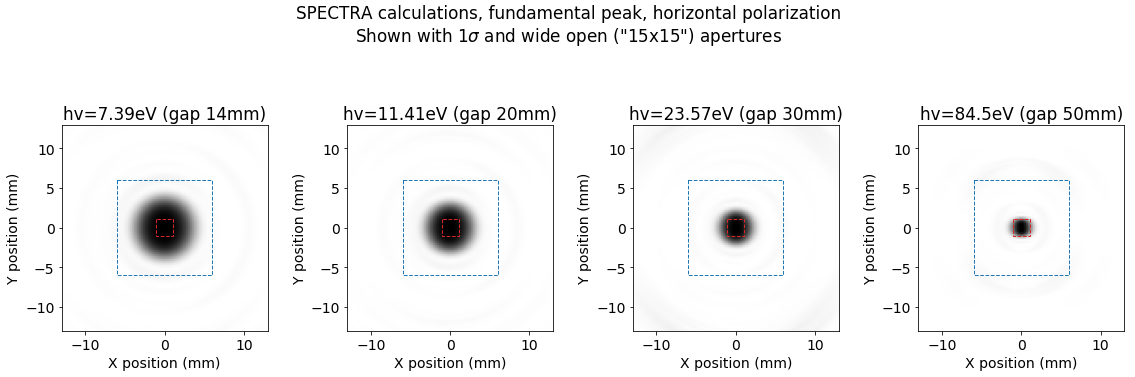

In [2]:
import matplotlib.patches as patches
calculation_folder = Path('SPECTRA_calculations/')
im01,im01_extent=loadSPECTRA_image(calculation_folder/"14mm_fundamental.dta")
im02,im02_extent=loadSPECTRA_image(calculation_folder/"20mm_fundamental.dta")
im03,im03_extent=loadSPECTRA_image(calculation_folder/"30mm_fundamental.dta")
im04,im04_extent=loadSPECTRA_image(calculation_folder/"50mm_fundamental.dta")

fig=plt.figure(figsize=(16,6))
fig.suptitle('SPECTRA calculations, fundamental peak, horizontal polarization\nShown with 1$\sigma$ and wide open ("15x15") apertures')

hv = [7.39,11.41,23.57,84.5]
gap = [14,20,30,50]
images = [im01,im02,im03,im04]
extents =[im01_extent,im02_extent,im03_extent,im04_extent]

for subplot_index in range(1,5):
    plt.subplot(1, 4, subplot_index)
    plt.imshow(images[subplot_index-1],aspect='auto',cmap='gray_r',extent=extents[subplot_index-1])
    one_sigma_aperture= patches.RegularPolygon((0, 0), numVertices=4, orientation=math.radians(45),radius=sqrt(2)*(2.1/2),linestyle='--',color='tab:red',fill=False)
    plt.gca().add_patch(one_sigma_aperture)
    wide_open_aperture= patches.RegularPolygon((0, 0), numVertices=4, orientation=math.radians(45),radius=sqrt(2)*(12/2),linestyle='--',color='tab:blue',fill=False)
    plt.gca().add_patch(wide_open_aperture)
    ax=plt.gca()
    ax.set_aspect(1)
    plt.xlabel('X position (mm)')
    plt.ylabel('Y position (mm)')
    plt.title("hv={0}eV (gap {1}mm)".format(hv[subplot_index-1],gap[subplot_index-1]))

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()   

Based on this, the following result is not especially surprising:

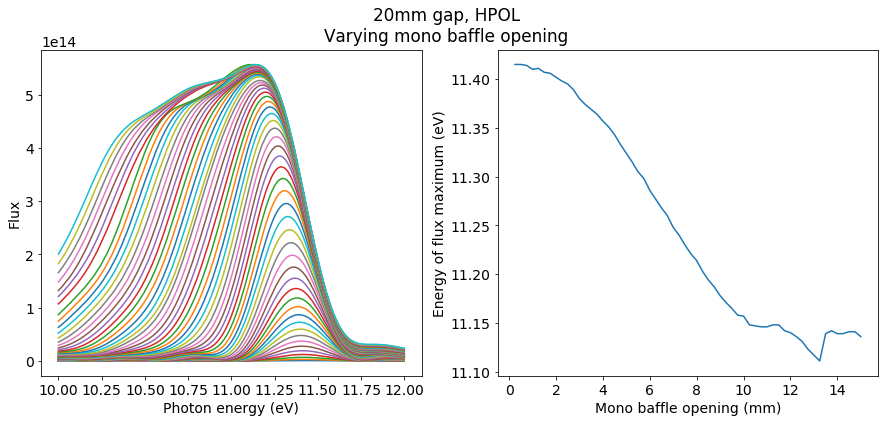

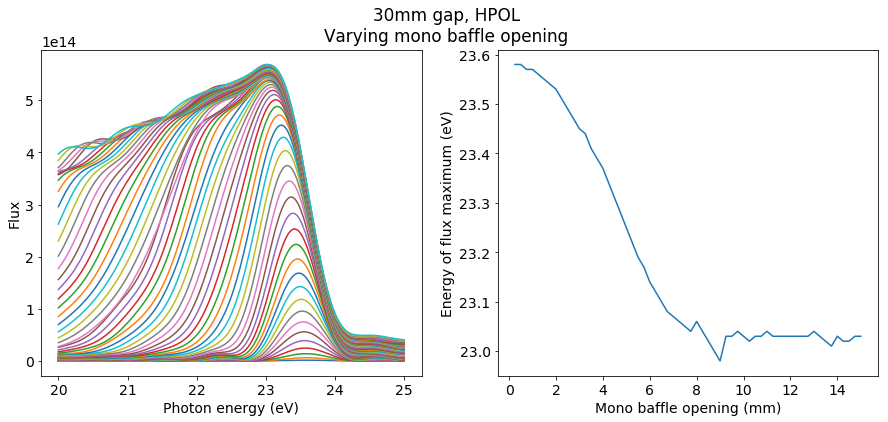

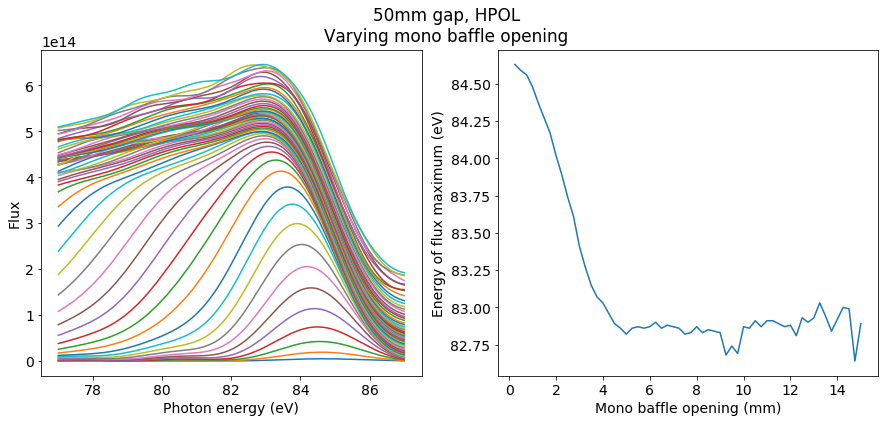

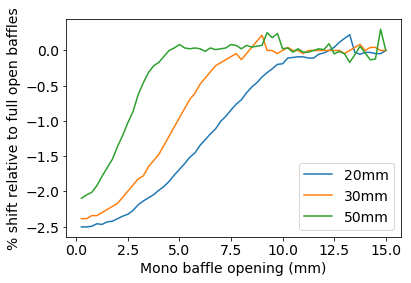

In [3]:
calculation_folder = Path('SPECTRA_calculations/acceptance/20mm')

entries = [n for n in range(1,60+1)]
calculationSet_20mm = [(loadSPECTRACalc(calculation_folder/"20mm-{0}.dc0".format(entryNumber))) for entryNumber in entries]

fig=plt.figure(figsize=(15,6))
plt.suptitle("20mm gap, HPOL\nVarying mono baffle opening")
peak_hv_20mm=[]
plt.subplot(1,2,1)
for scan in calculationSet_20mm:
    flux_max=max(scan['flux'])
    flux_max_index=scan['flux'].index(flux_max)
    peak_hv_20mm.append(scan['mono_energy'][flux_max_index])
    plt.plot(scan['mono_energy'],scan['flux'])
plt.ylabel("Flux")
plt.xlabel("Photon energy (eV)")
plt.subplot(1,2,2)
opening_20mm=[(0.25+(n*0.25)) for n in range(len(calculationSet_20mm))]
plt.plot(opening_20mm,peak_hv_20mm)
plt.ylabel("Energy of flux maximum (eV)")
plt.xlabel("Mono baffle opening (mm)")
plt.show()




calculation_folder = Path('SPECTRA_calculations/acceptance/30mm')

entries = [n for n in range(1,60+1)]
calculationSet_30mm = [(loadSPECTRACalc(calculation_folder/"30mm-{0}.dc0".format(entryNumber))) for entryNumber in entries]

fig=plt.figure(figsize=(15,6))
plt.suptitle("30mm gap, HPOL\nVarying mono baffle opening")
peak_hv_30mm=[]
plt.subplot(1,2,1)
for scan in calculationSet_30mm:
    flux_max=max(scan['flux'])
    flux_max_index=scan['flux'].index(flux_max)
    peak_hv_30mm.append(scan['mono_energy'][flux_max_index])
    plt.plot(scan['mono_energy'],scan['flux'])
plt.ylabel("Flux")
plt.xlabel("Photon energy (eV)")
plt.subplot(1,2,2)
opening_30mm=[(0.25+(n*0.25)) for n in range(len(calculationSet_30mm))]
plt.plot(opening_30mm,peak_hv_30mm)
plt.ylabel("Energy of flux maximum (eV)")
plt.xlabel("Mono baffle opening (mm)")
plt.show()

calculation_folder = Path('SPECTRA_calculations/acceptance/50mm')

entries = [n for n in range(1,60+1)]
calculationSet_50mm = [(loadSPECTRACalc(calculation_folder/"50mm-{0}.dc0".format(entryNumber))) for entryNumber in entries]

fig=plt.figure(figsize=(15,6))
plt.suptitle("50mm gap, HPOL\nVarying mono baffle opening")
peak_hv_50mm=[]
plt.subplot(1,2,1)
for scan in calculationSet_50mm:
    flux_max=max(scan['flux'])
    flux_max_index=scan['flux'].index(flux_max)
    peak_hv_50mm.append(scan['mono_energy'][flux_max_index])
    plt.plot(scan['mono_energy'],scan['flux'])
plt.ylabel("Flux")
plt.xlabel("Photon energy (eV)")
plt.subplot(1,2,2)
opening_50mm=[(0.25+(n*0.25)) for n in range(len(calculationSet_50mm))]
plt.plot(opening_50mm,peak_hv_50mm)
plt.ylabel("Energy of flux maximum (eV)")
plt.xlabel("Mono baffle opening (mm)")
plt.show()

peak_hv_20mm_normalized = [100-((100*n)/peak_hv_20mm[-1]) for n in peak_hv_20mm]
peak_hv_30mm_normalized = [100-((100*n)/peak_hv_30mm[-1]) for n in peak_hv_30mm]
peak_hv_50mm_normalized = [100-((100*n)/peak_hv_50mm[-1]) for n in peak_hv_50mm]

plt.plot(opening_20mm,peak_hv_20mm_normalized,label="20mm")
plt.plot(opening_30mm,peak_hv_30mm_normalized,label="30mm")
plt.plot(opening_50mm,peak_hv_50mm_normalized,label="50mm")
plt.legend()
plt.ylabel("% shift relative to full open baffles")
plt.xlabel("Mono baffle opening (mm)")
plt.show()

At some baffle opening, the peak position saturates. Since the beam is fatter at low gaps, it happens at a wider opening. In all cases the total change (nearly closed to full open) is around 2.5%. 

So if you know that the narrow acceptance EPU peak comes at energy (X)eV, for peak flux you should detune the monochromator to (X*0.98)eV

## Part II: Experimental measurements

There is a little extra grunt work required here because the data files are not totally clean and uniform. The scan length varies, it's split over several files and they are not arranged contiguously. Easy enough to deal with:

***
### Local functions

In [4]:
# Since we can't just slurp up all scans in all files, we will semi-manually compile a list of good scans to use

#*****************************************************
def addScansToList(path,targetLength):
#*****************************************************

    h5_fp=loadHDF5(path)
    scanNames = [key.lstrip('entry') for key in h5_fp.keys()]
    for scanName in scanNames:

        dataSetNames = [key for key in h5_fp["entry{0}/measurement".format(scanName)].keys()]
        dataSetLength = len(np.array(h5_fp["entry{0}/measurement/{1}".format(scanName,dataSetNames[0])]))

        if dataSetLength == targetLength:
            scansToLoad.append((path,scanName))

    h5_fp.close()

    
# EPU gap and phase info is not always saved. If you check for it, you can add that info to the plots   

#*****************************************************
def EPU_info_exists(fileName,scanIndex):
#*****************************************************    
    h5_fp=loadHDF5(fileName)
    dataSetNames = [key for key in h5_fp["entry{0}/measurement".format(scanIndex)].keys()]
    h5_fp.close()
    if ('EPU_R1_110_GAPposition' in dataSetNames) and ('EPU_R1_110_PHASEposition' in dataSetNames):
        return 1
    else:
        return 0
    
#*****************************************************
def valuesAreClose(val1,val2):
#*****************************************************    
    if abs(val1-val2)/abs(val1+val2) < 0.01:
        return 1
    else:
        return 0

In [5]:
# This targetLength values were obtained by looking at the contents of each file - it's obvious how long
# a completed scan is.

scansToLoad=[]
# The first scanset was a bit of a mess, so I'm dropping it from consideration
#dataFile = 'Data/(18.12.15)_photonenergy_mono_baf_scan.h5'
#addScansToList(path=dataFile,targetLength=121)
dataFile = 'Data/(18.12.15)_photonenergy_mono_baf_scanB.h5'
addScansToList(path=dataFile,targetLength=121)
dataFile = 'Data/(18.12.15)_photonenergy_mono_baf_scanC.h5'
addScansToList(path=dataFile,targetLength=141)
dataFile = 'Data/(18.12.15)_photonenergy_mono_baf_scanD.h5'
addScansToList(path=dataFile,targetLength=151)
dataFile = 'Data/(18.12.15)_photonenergy_mono_baf_scanE.h5'
addScansToList(path=dataFile,targetLength=151)
dataFile = 'Data/(18.12.15)_photonenergy_mono_baf_scanE.h5'
addScansToList(path=dataFile,targetLength=111)
dataFile = 'Data/(18.12.15)_photonenergy_mono_baf_scanF.h5'
addScansToList(path=dataFile,targetLength=111)

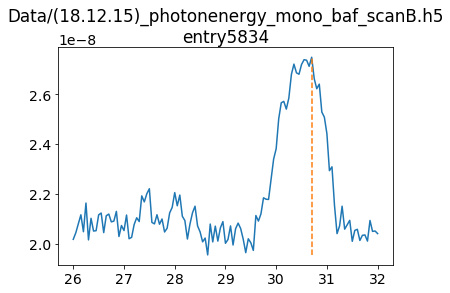

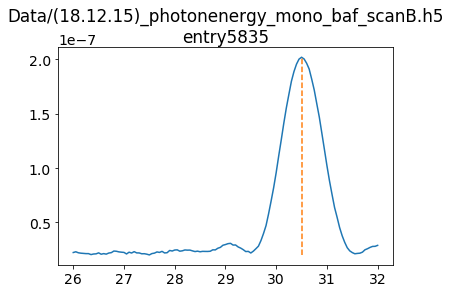

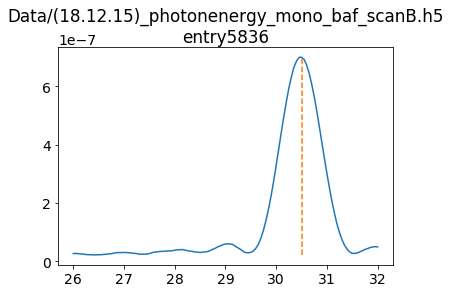

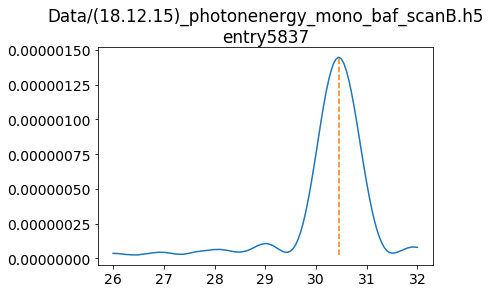

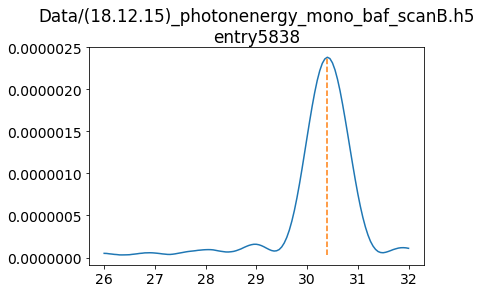

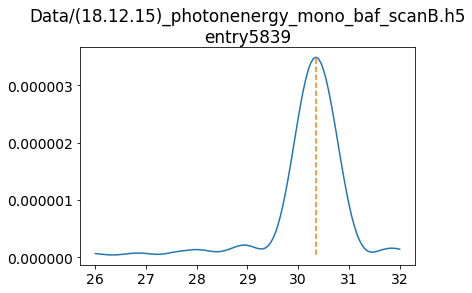

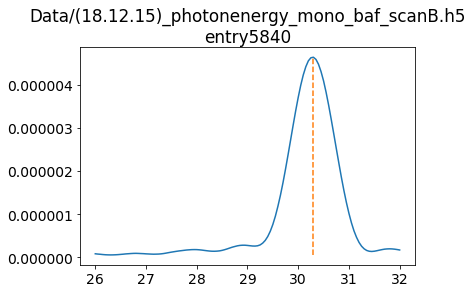

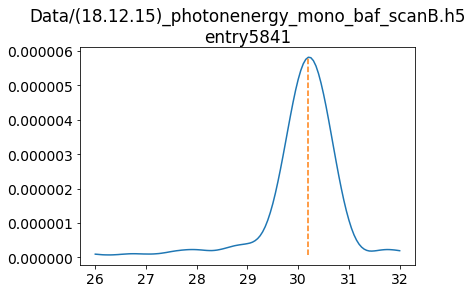

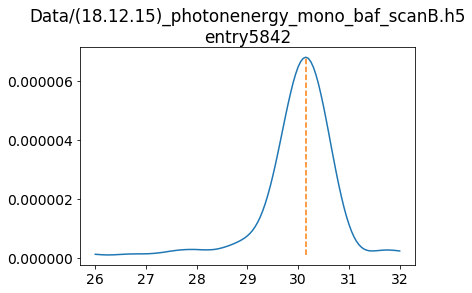

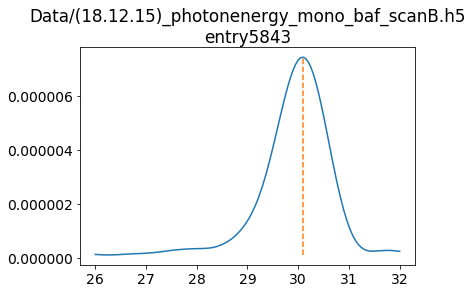

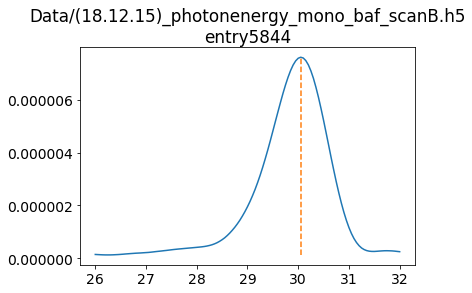

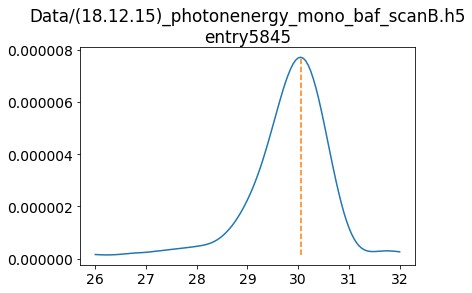

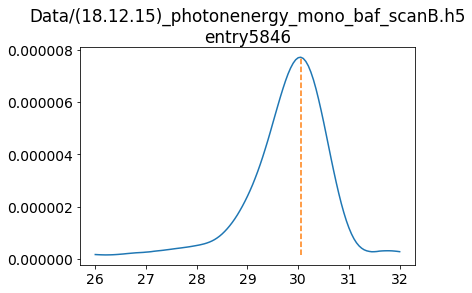

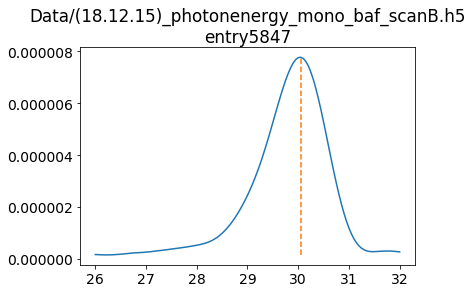

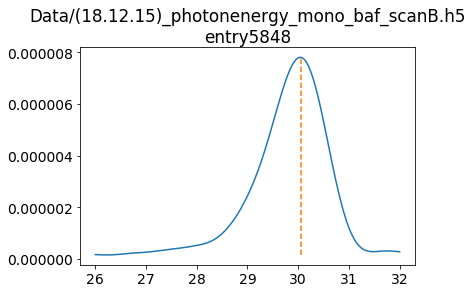

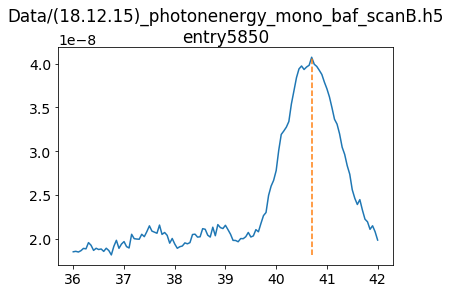

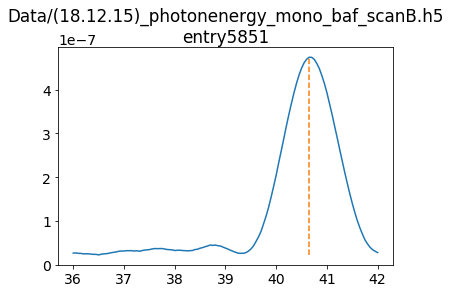

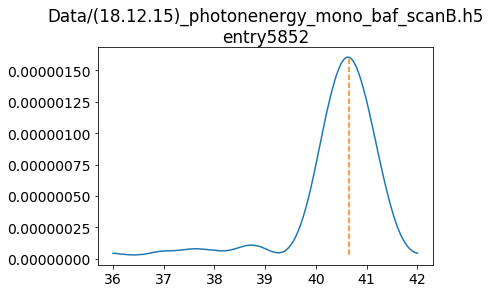

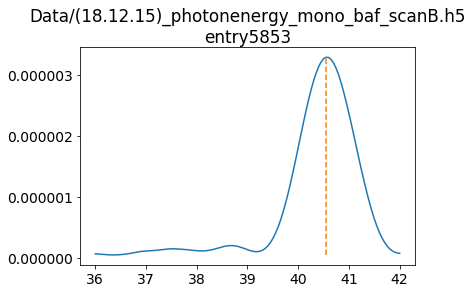

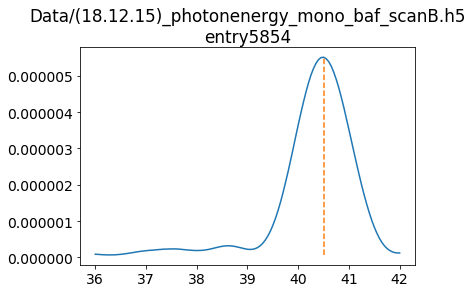

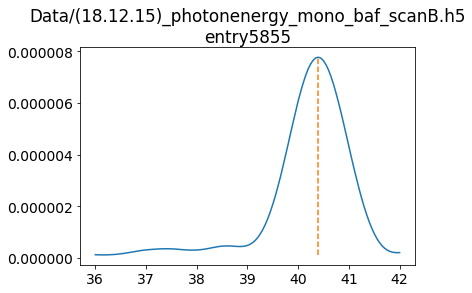

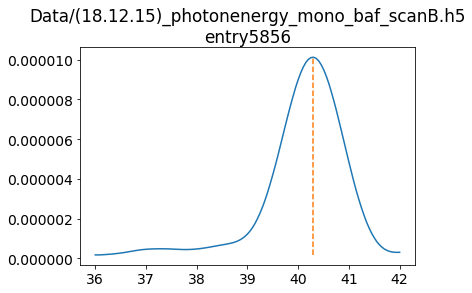

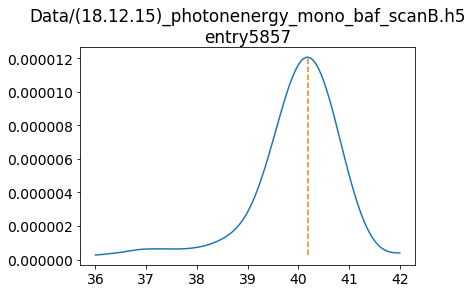

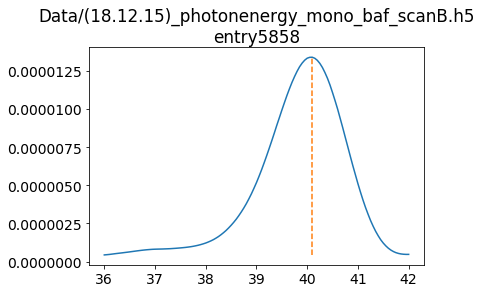

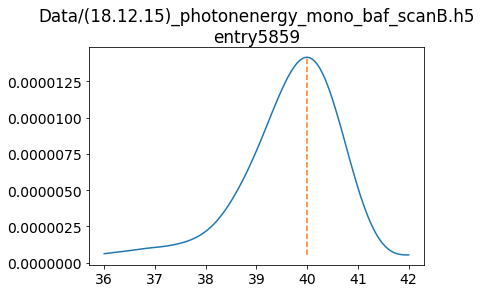

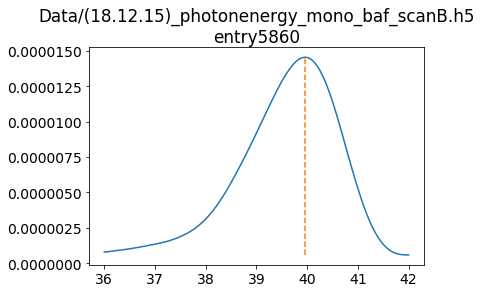

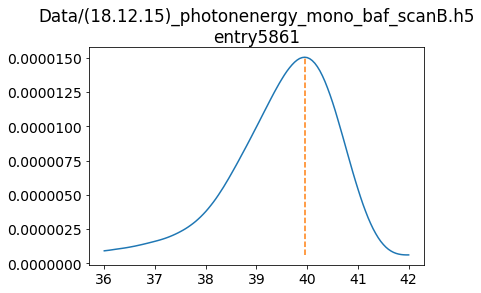

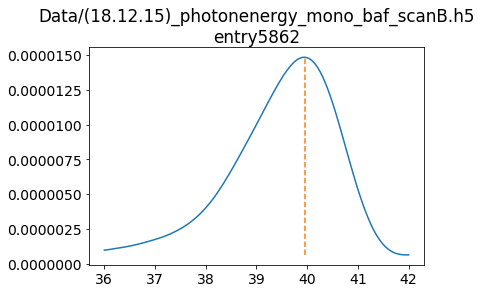

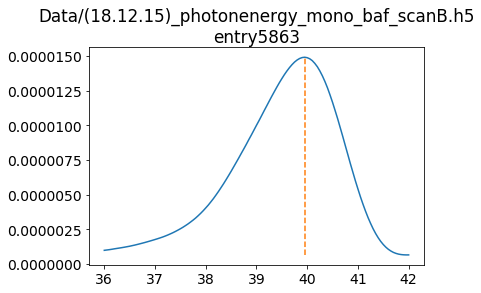

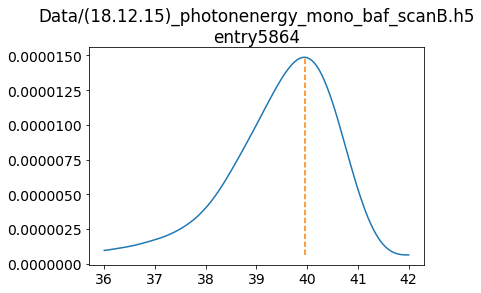

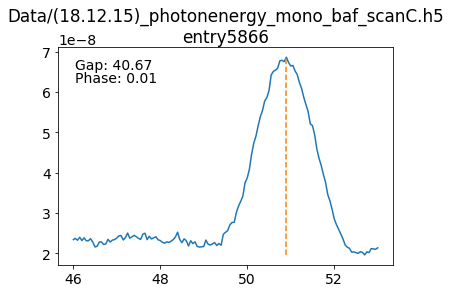

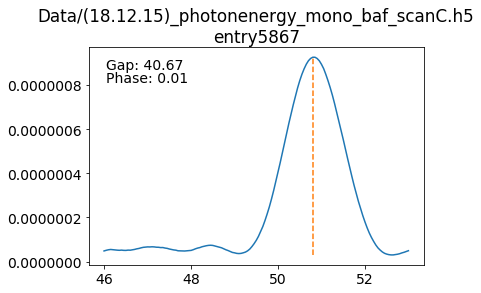

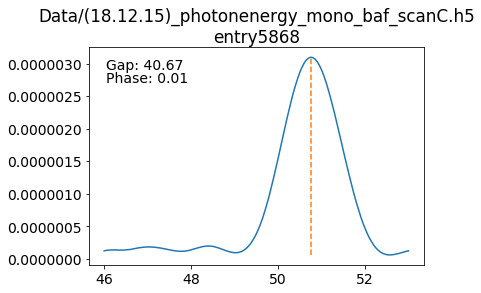

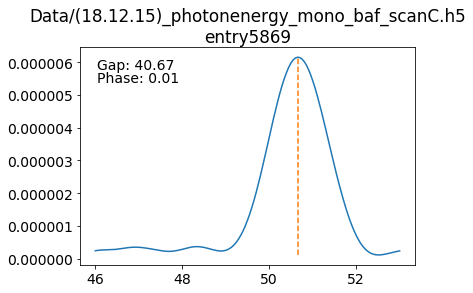

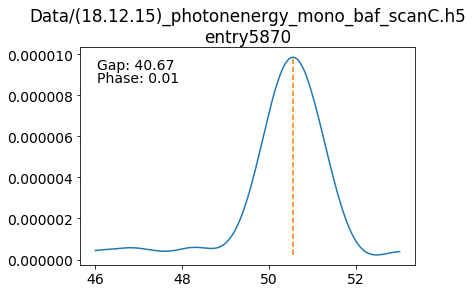

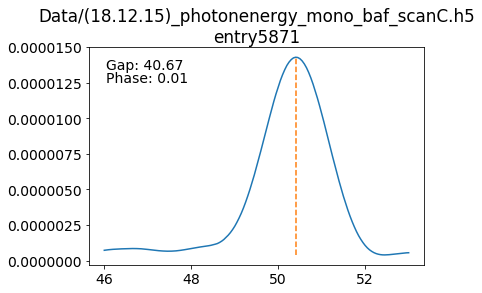

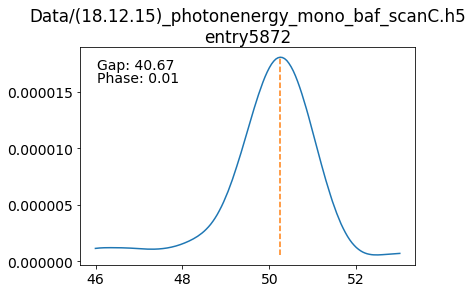

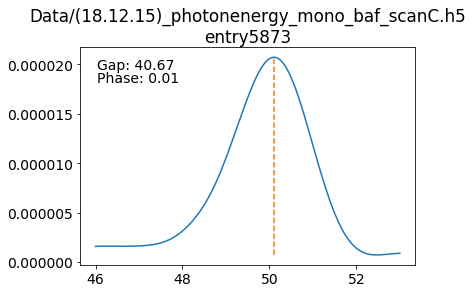

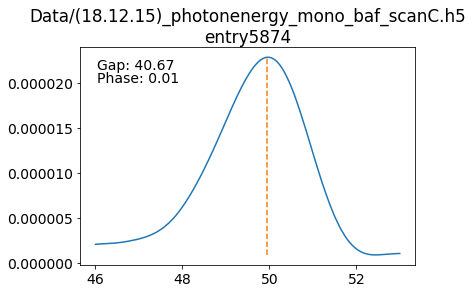

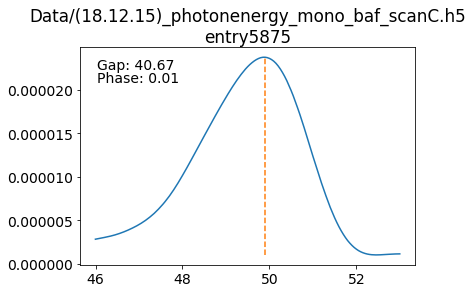

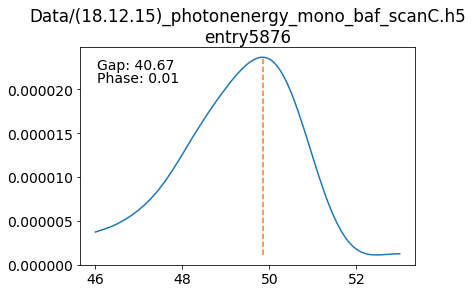

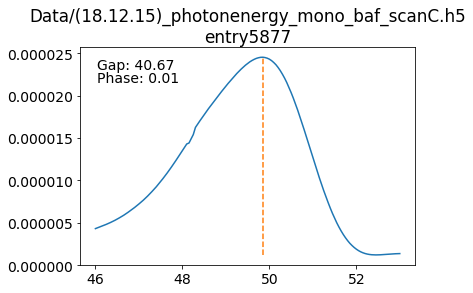

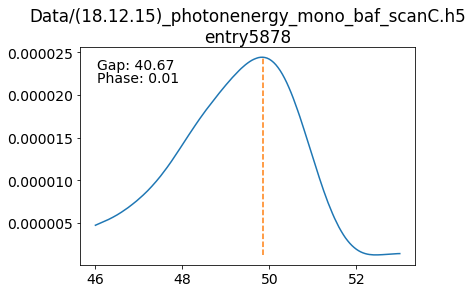

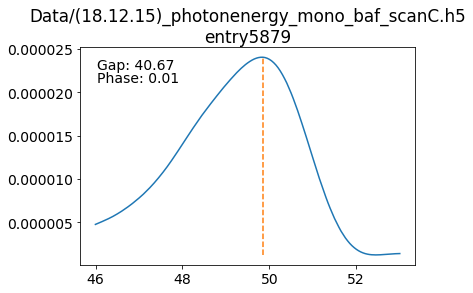

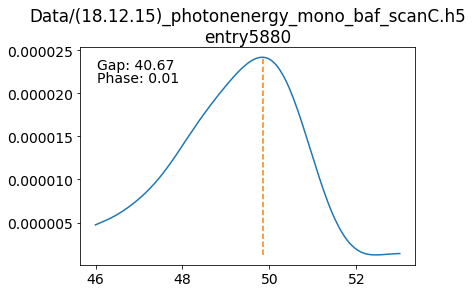

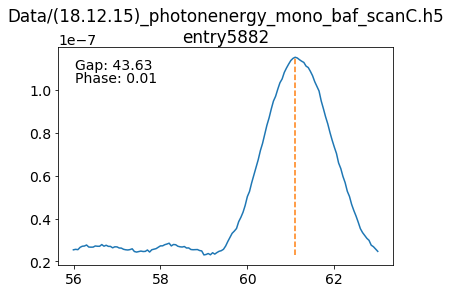

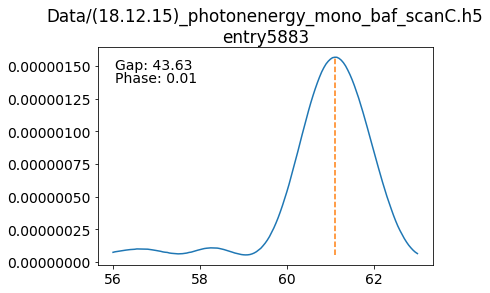

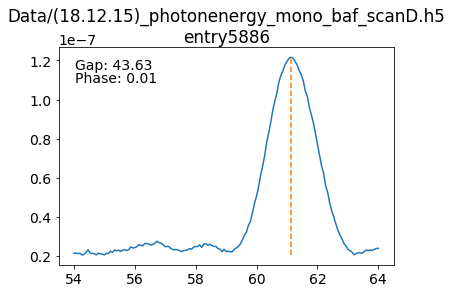

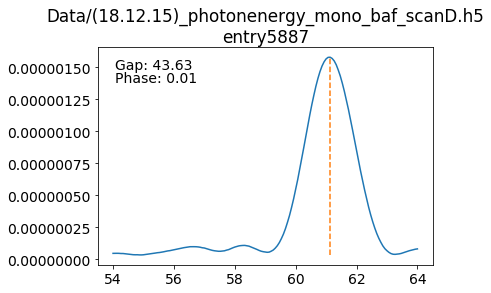

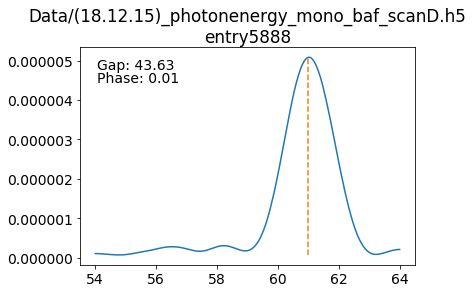

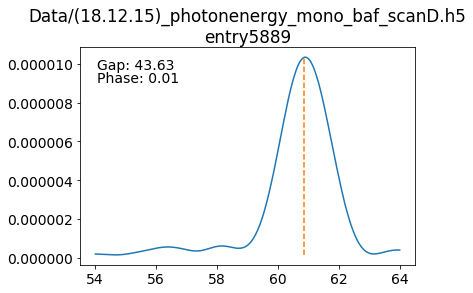

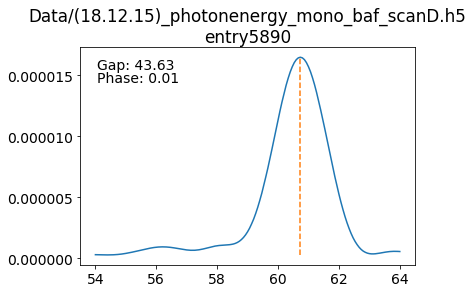

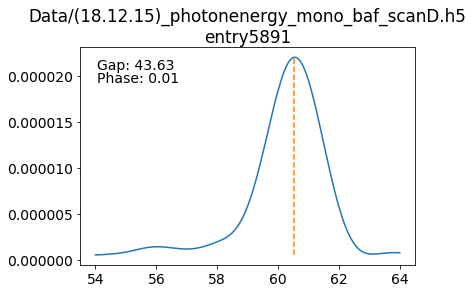

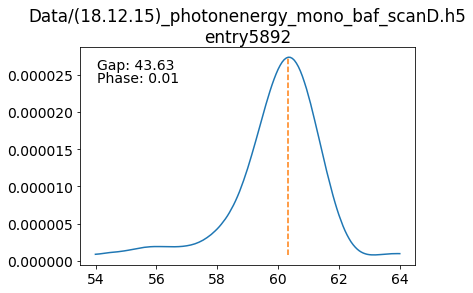

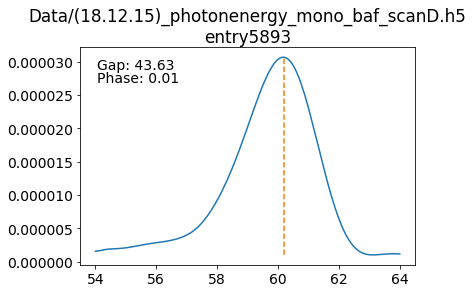

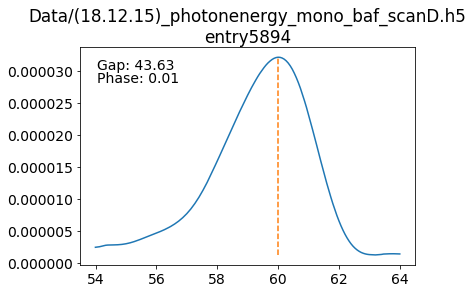

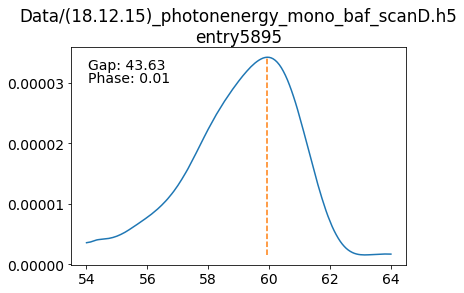

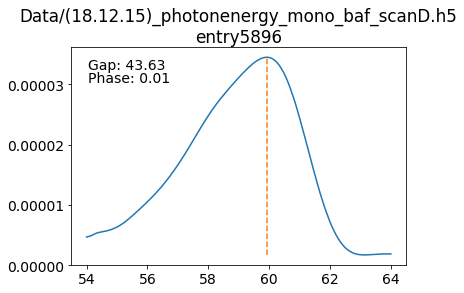

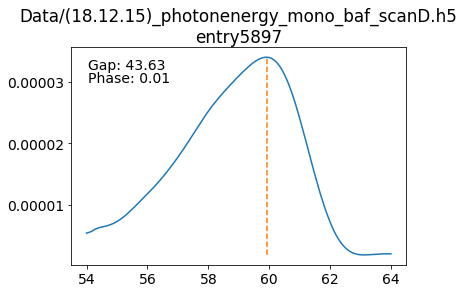

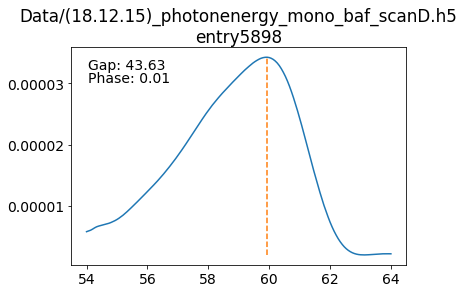

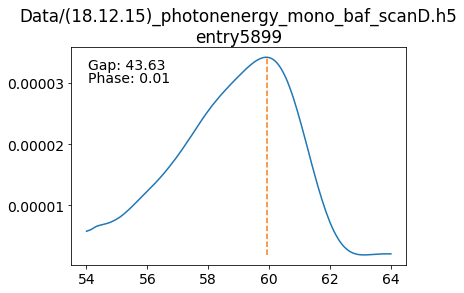

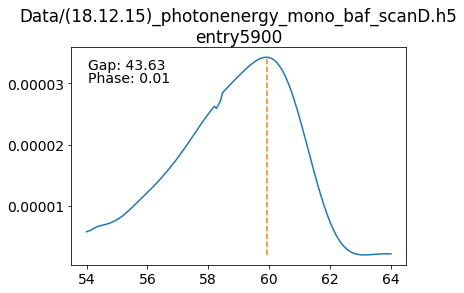

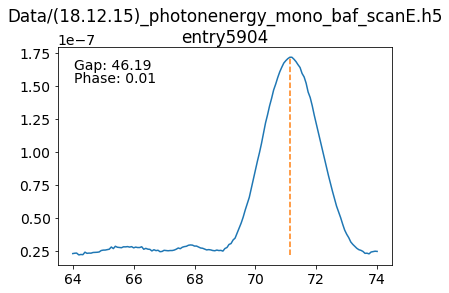

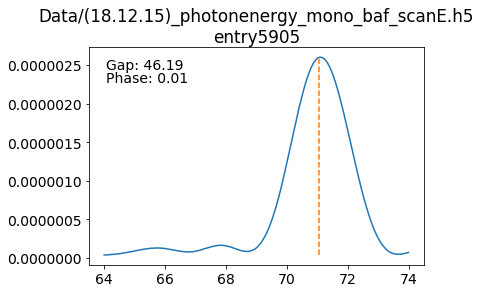

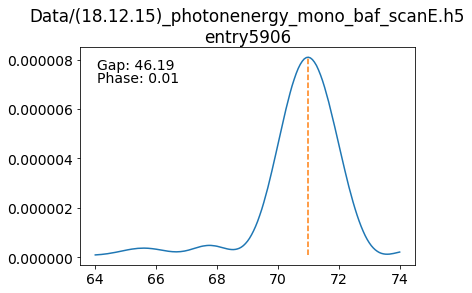

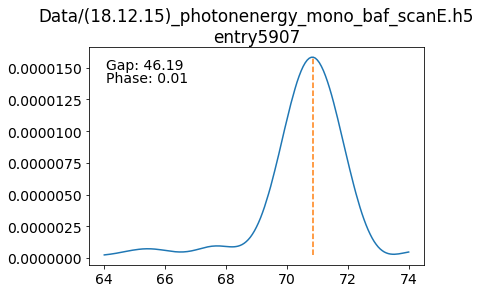

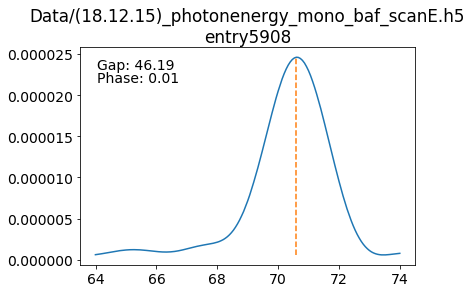

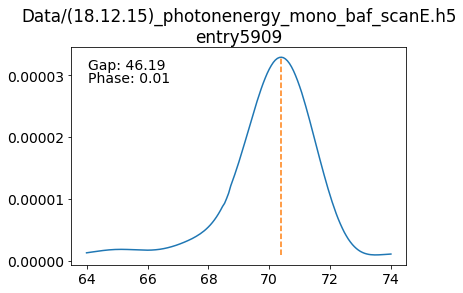

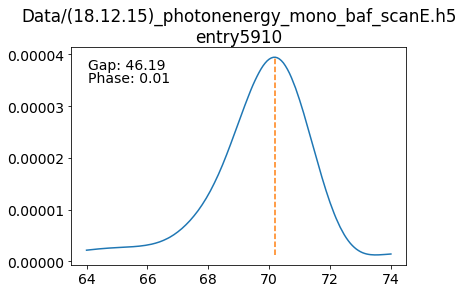

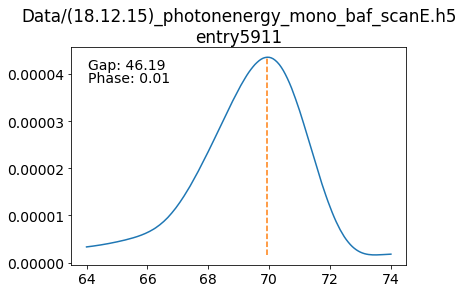

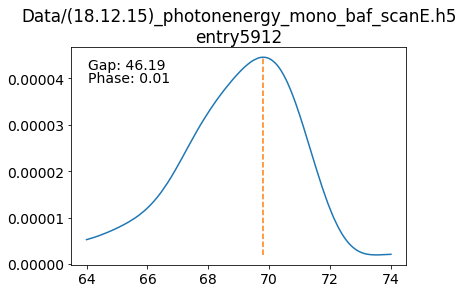

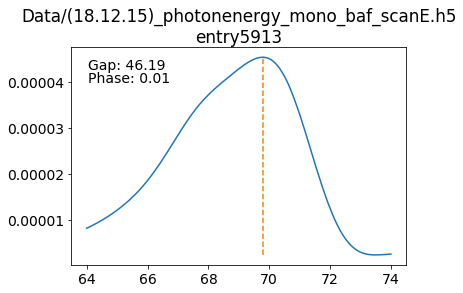

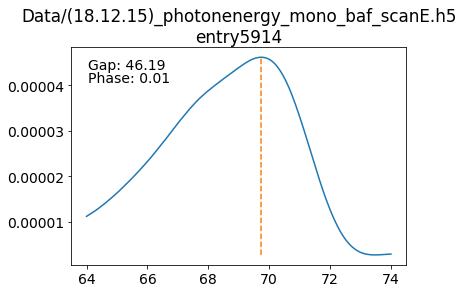

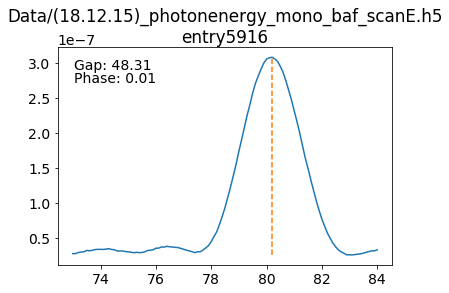

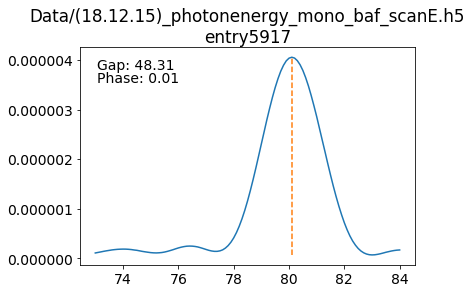

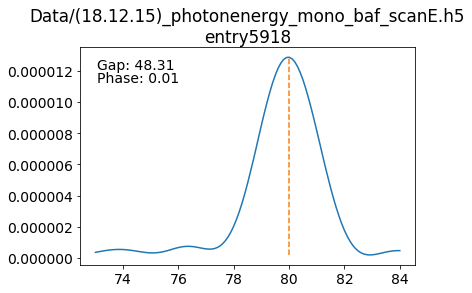

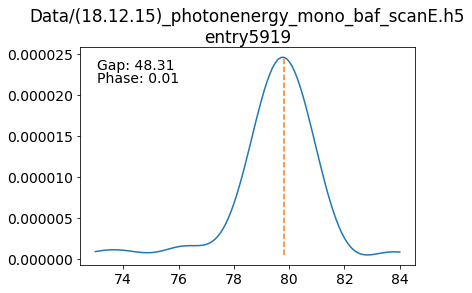

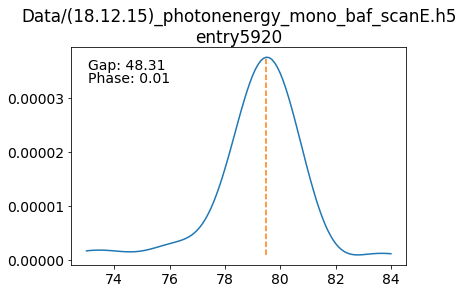

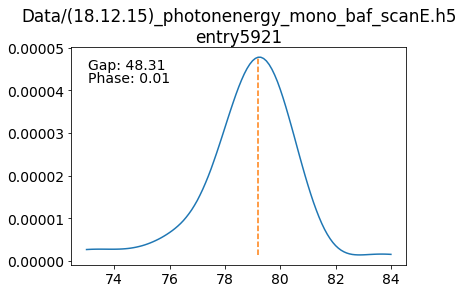

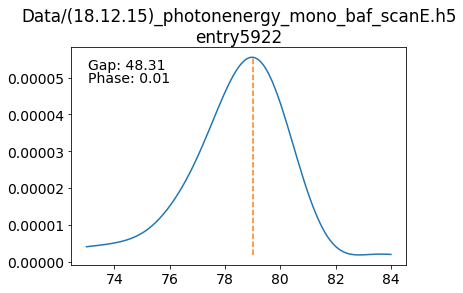

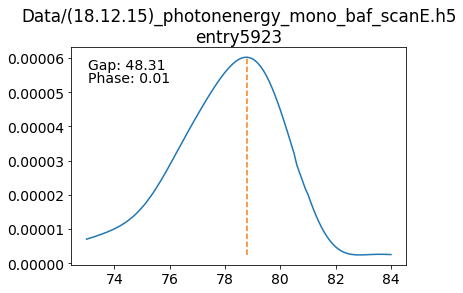

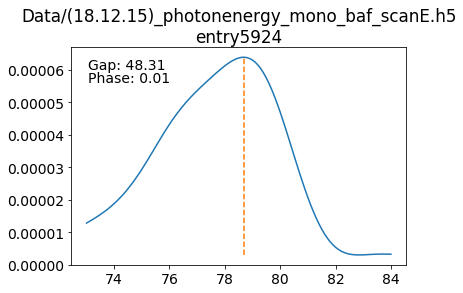

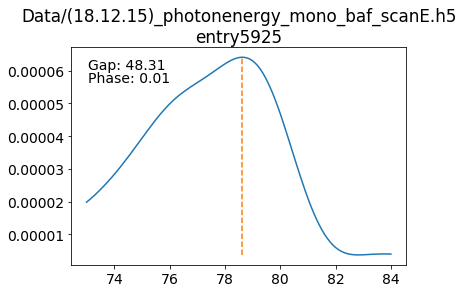

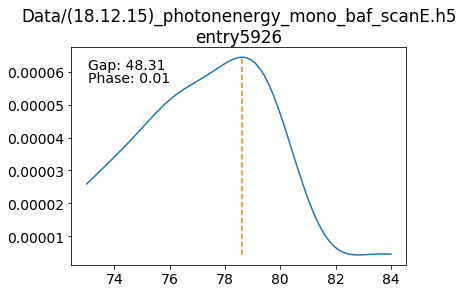

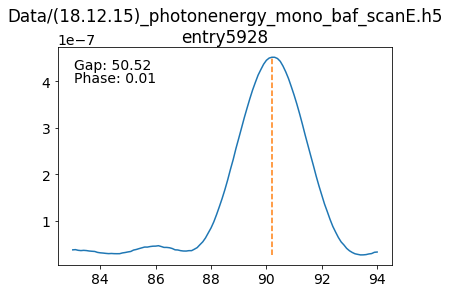

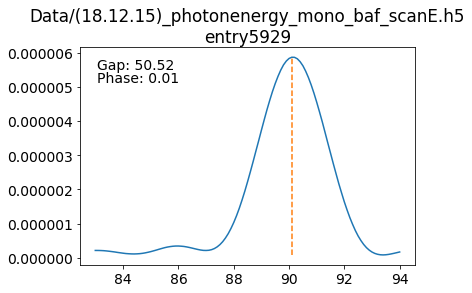

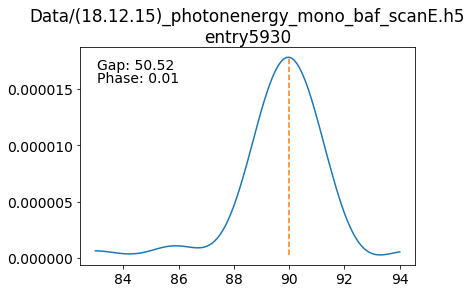

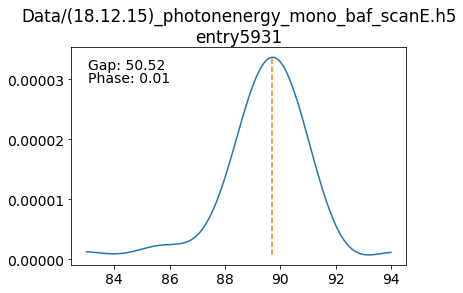

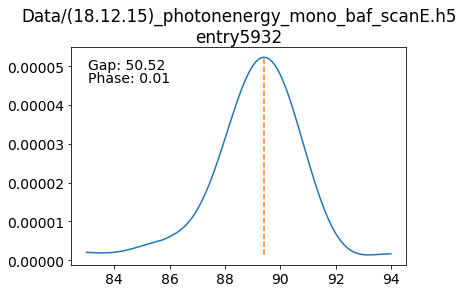

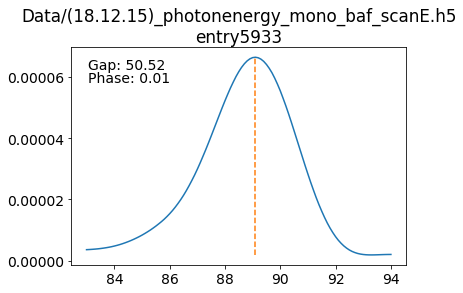

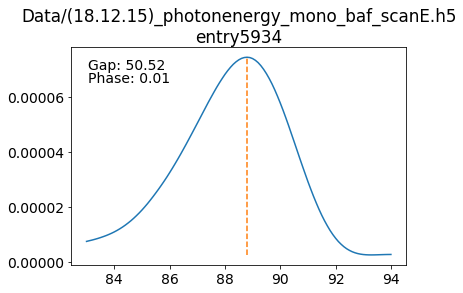

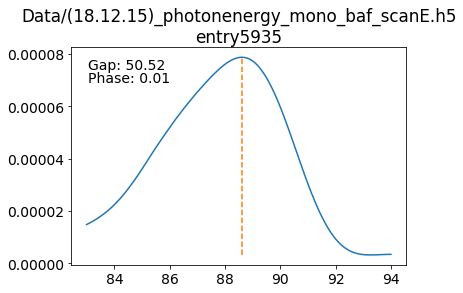

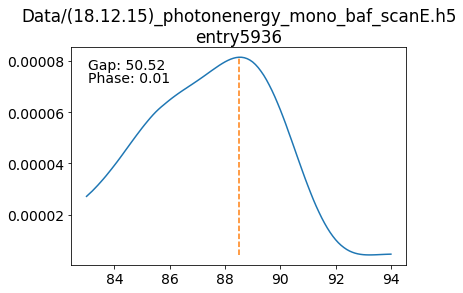

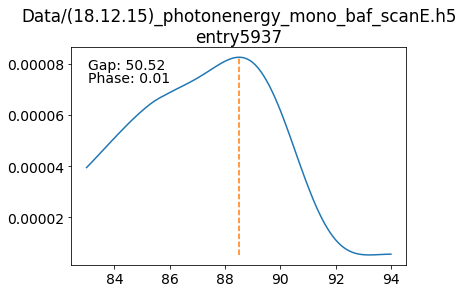

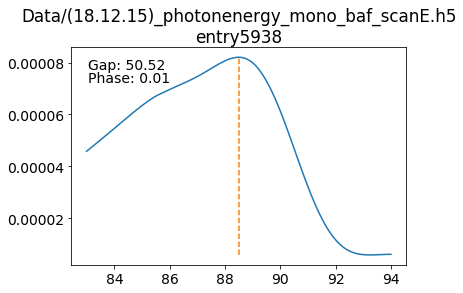

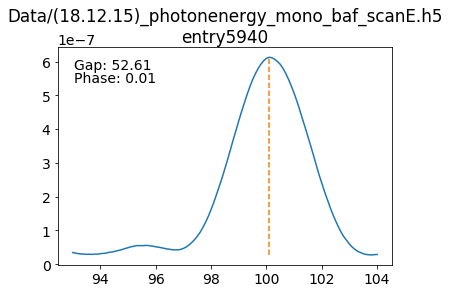

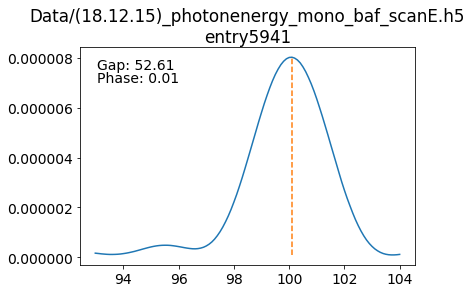

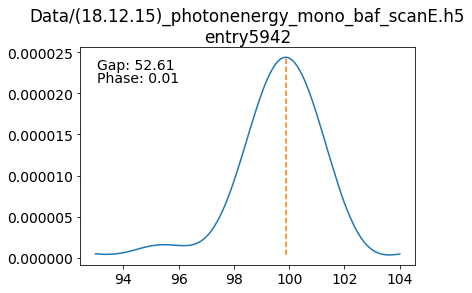

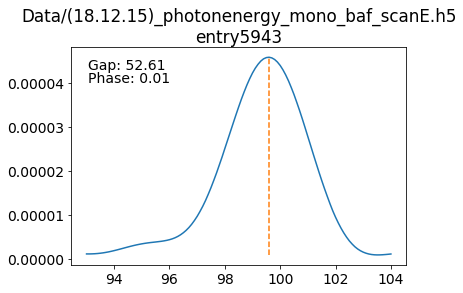

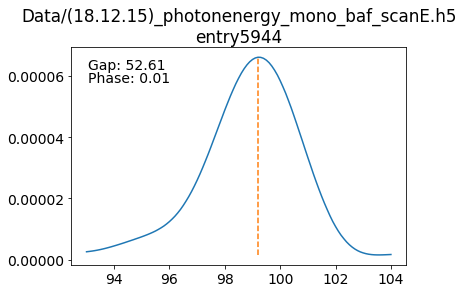

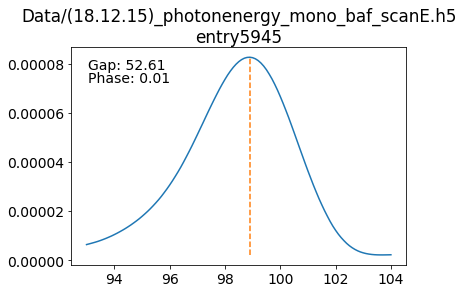

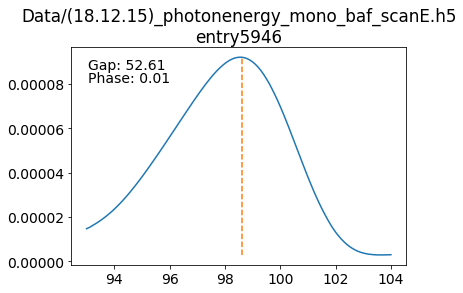

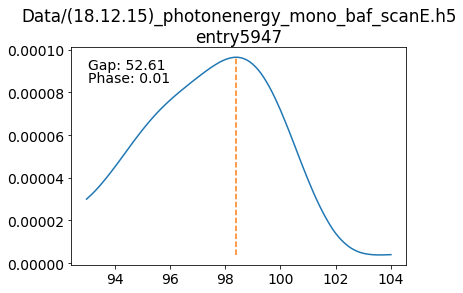

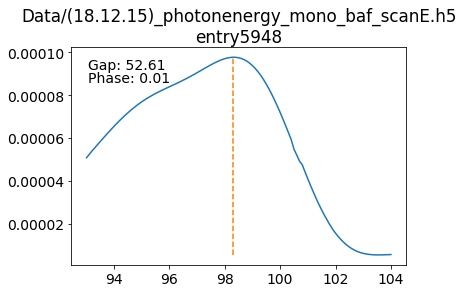

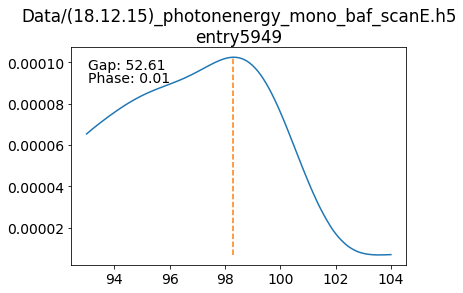

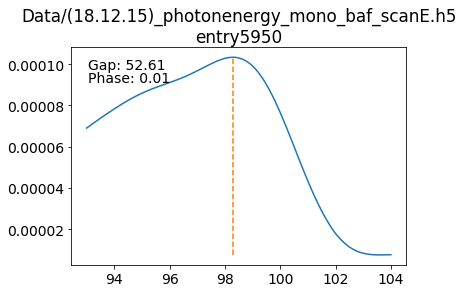

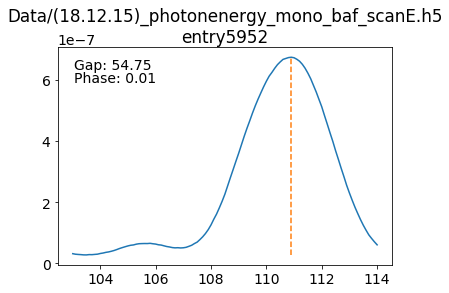

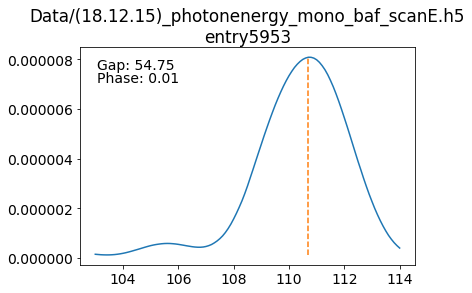

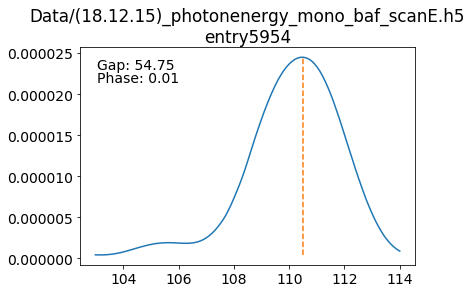

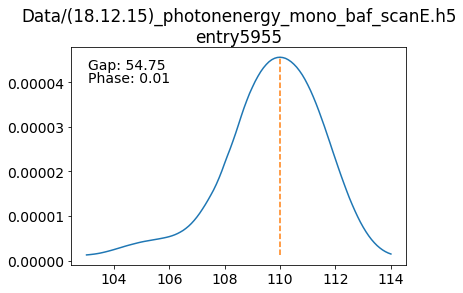

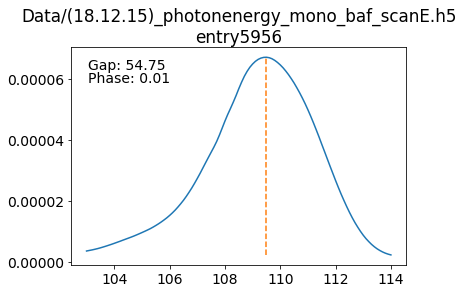

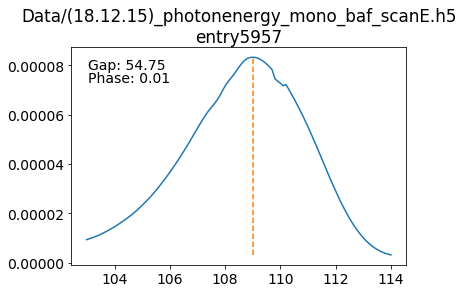

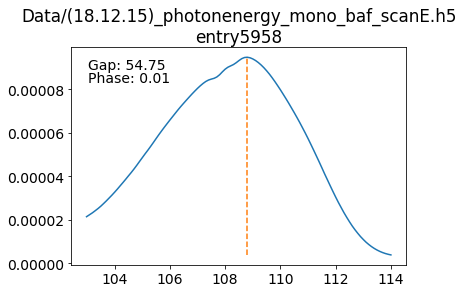

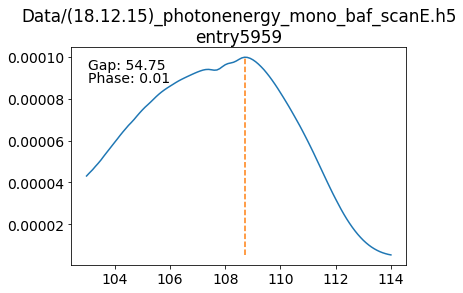

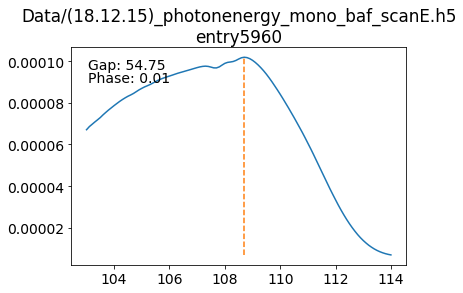

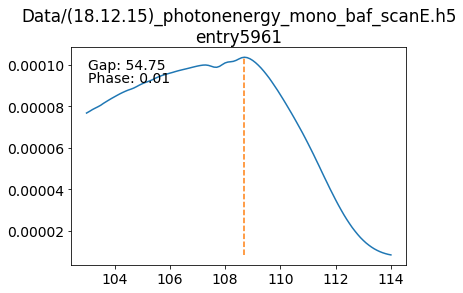

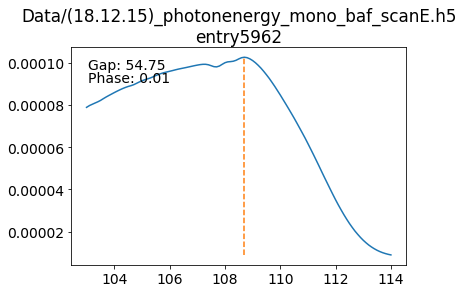

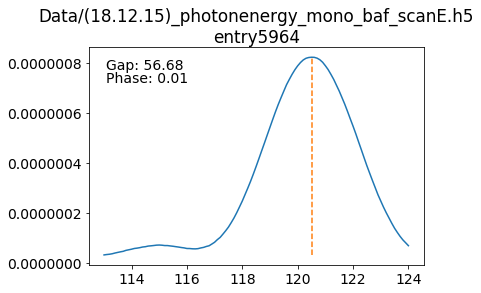

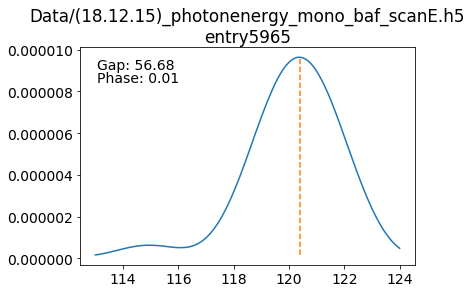

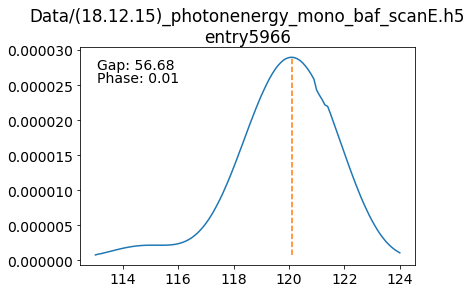

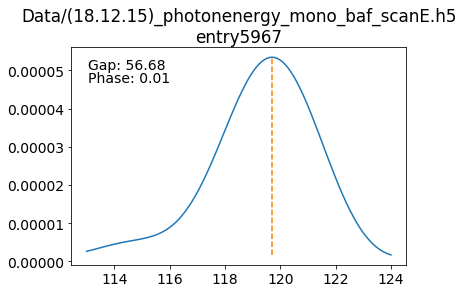

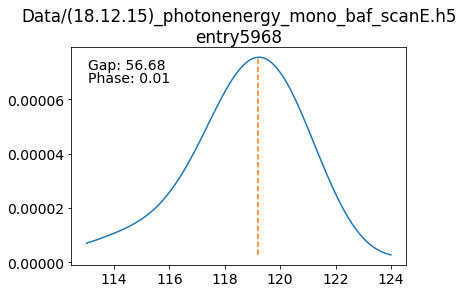

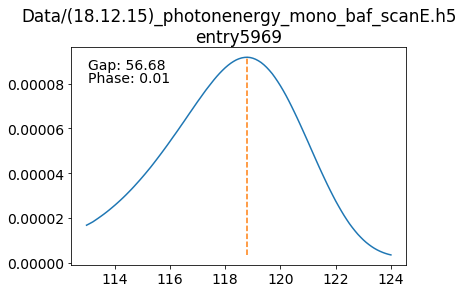

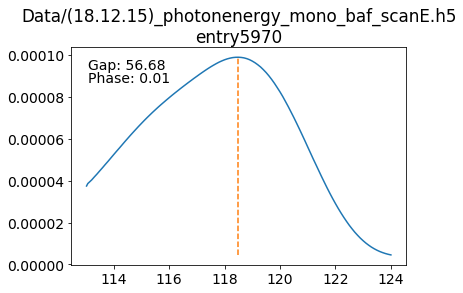

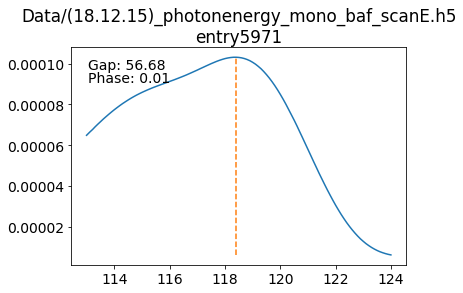

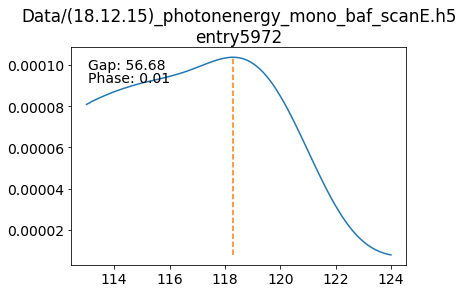

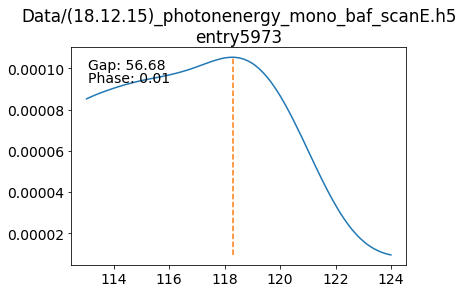

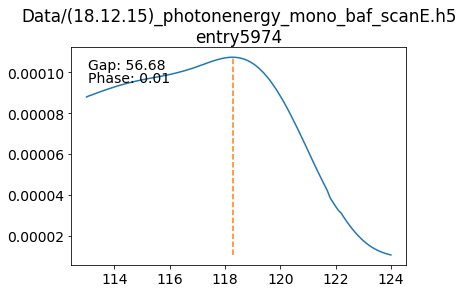

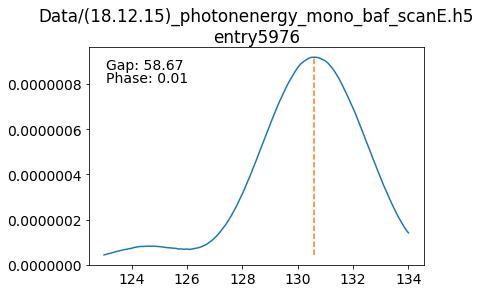

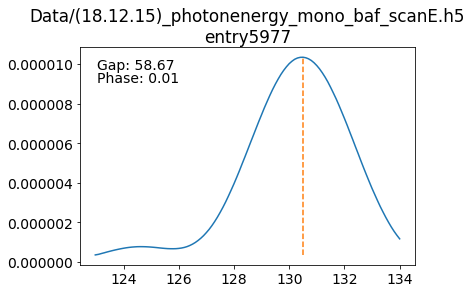

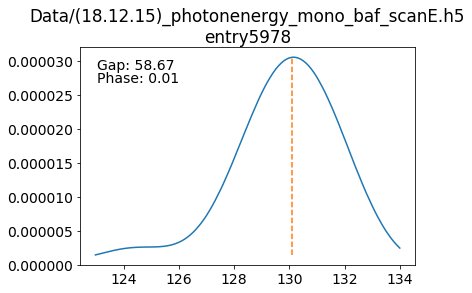

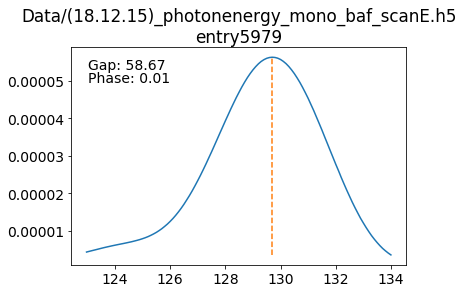

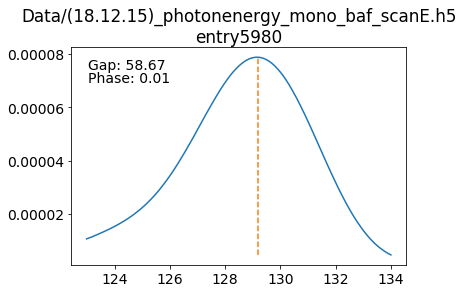

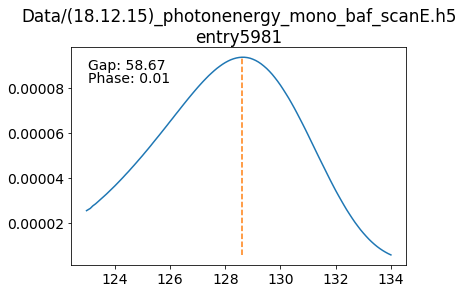

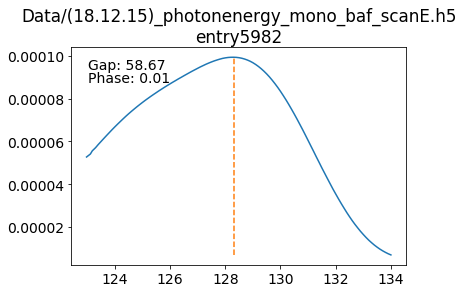

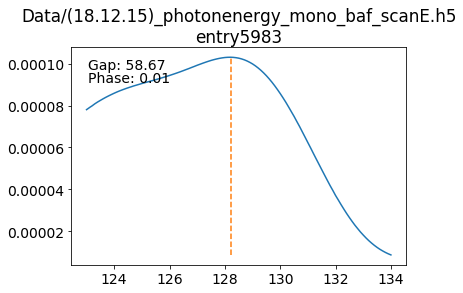

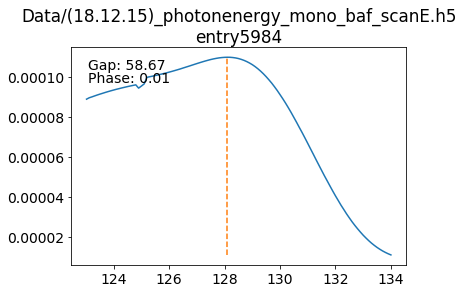

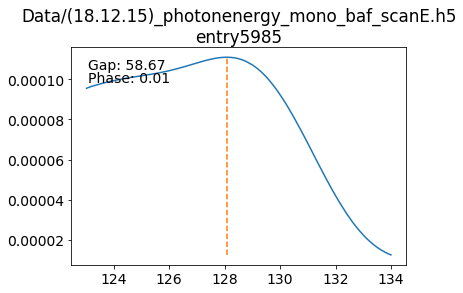

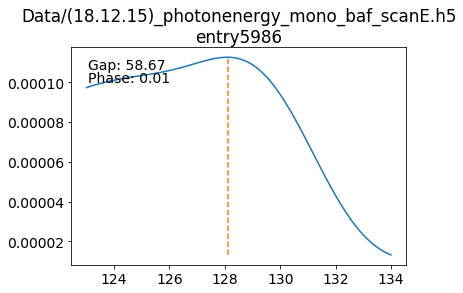

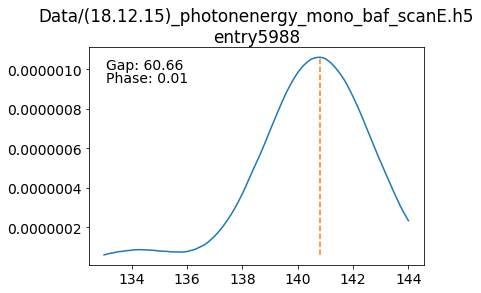

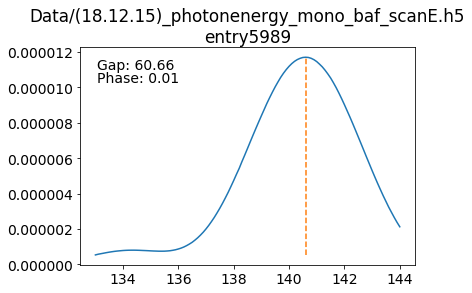

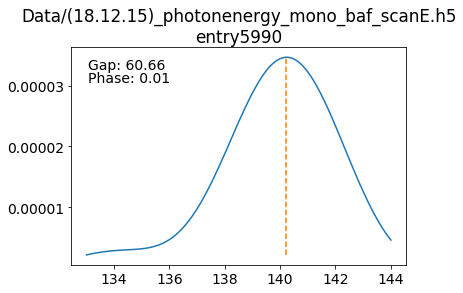

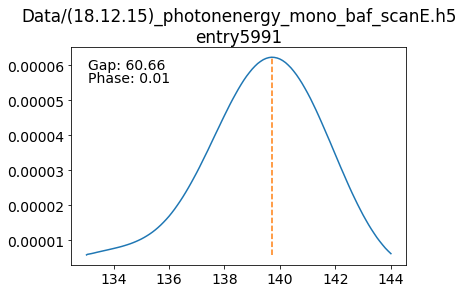

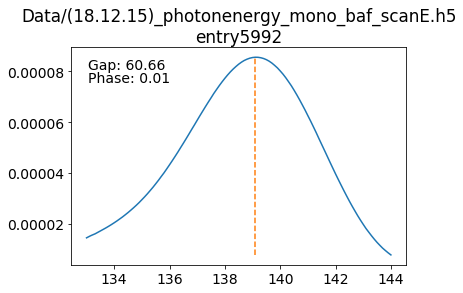

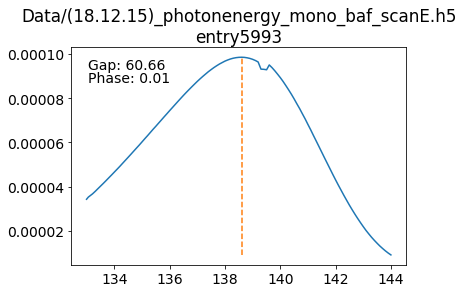

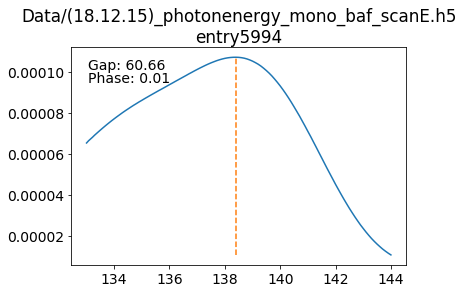

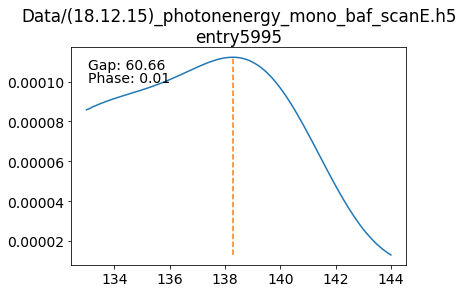

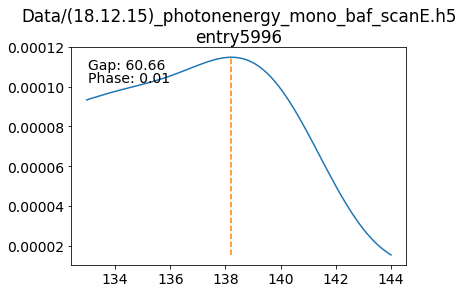

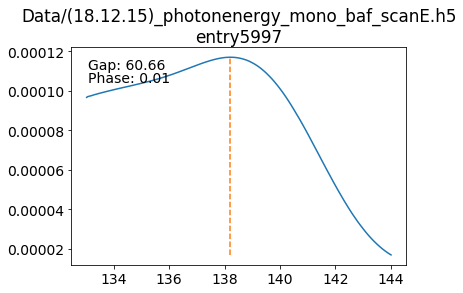

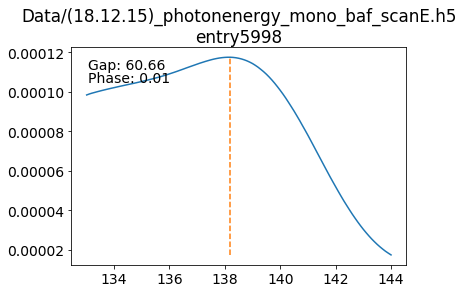

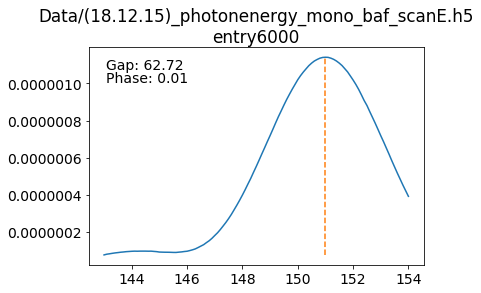

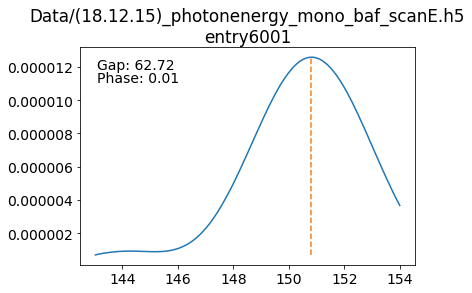

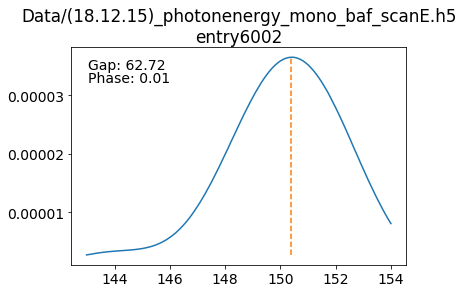

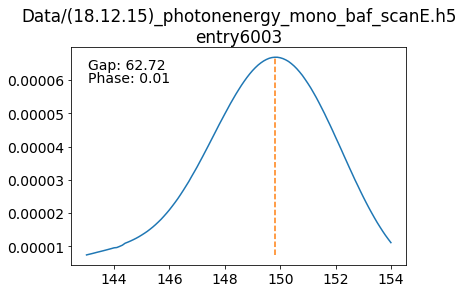

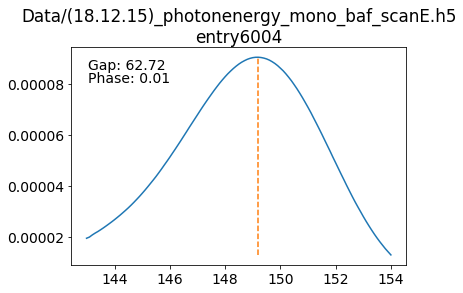

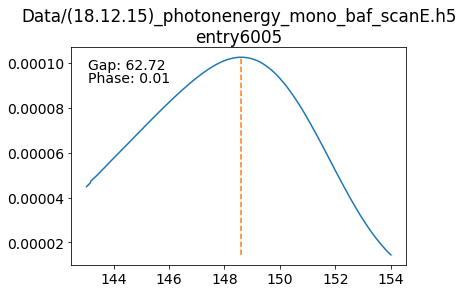

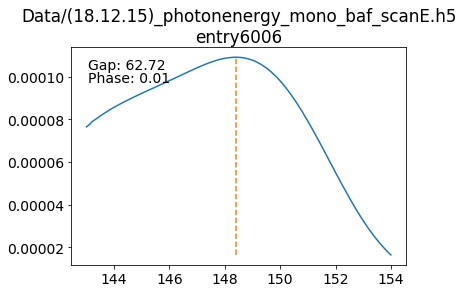

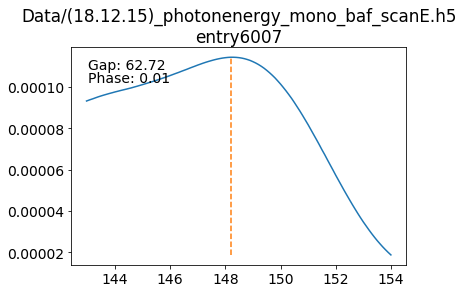

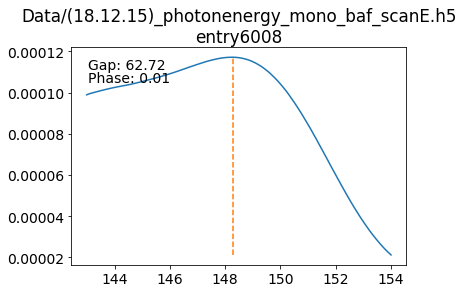

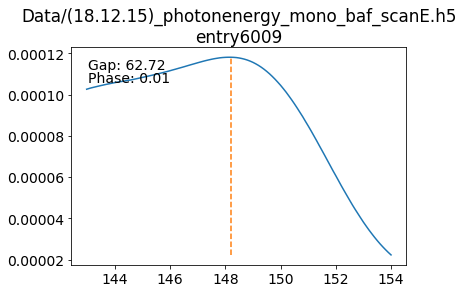

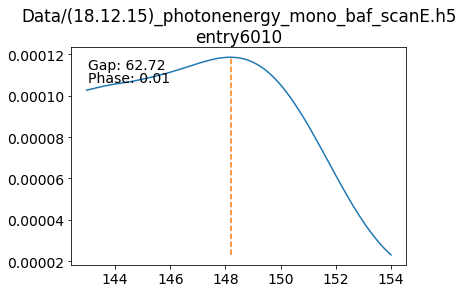

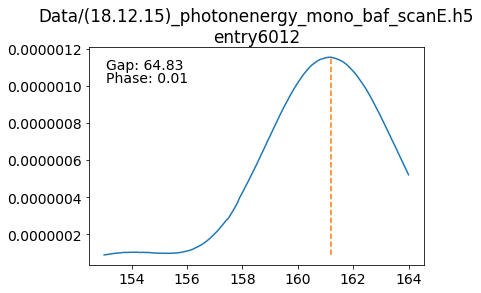

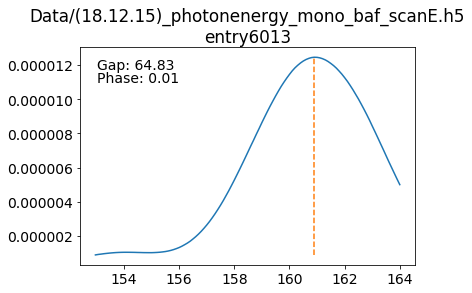

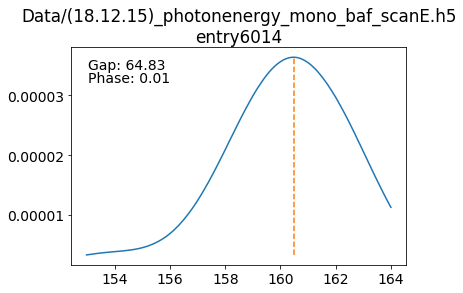

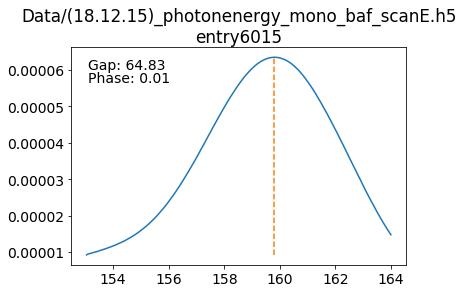

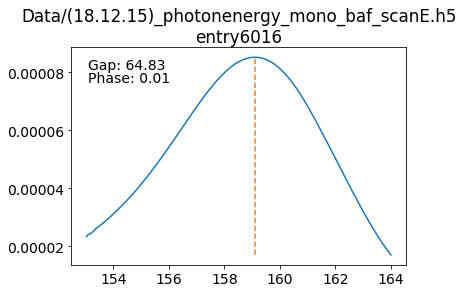

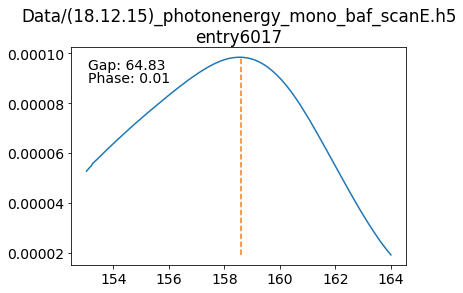

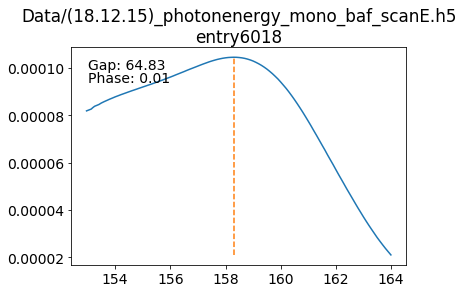

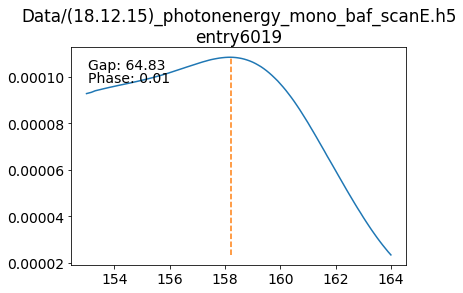

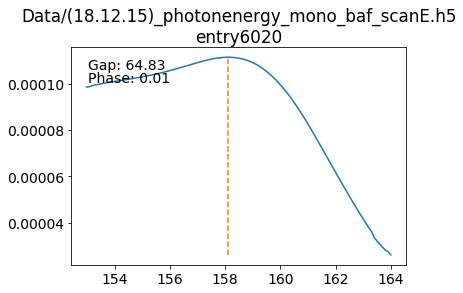

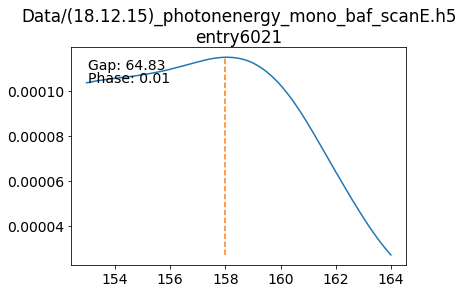

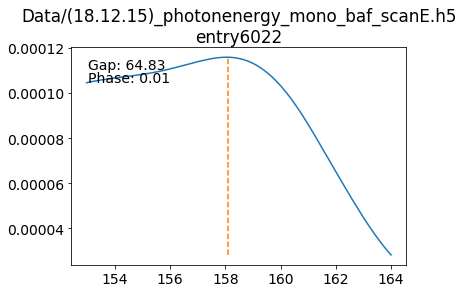

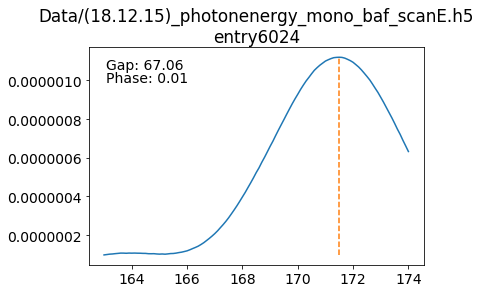

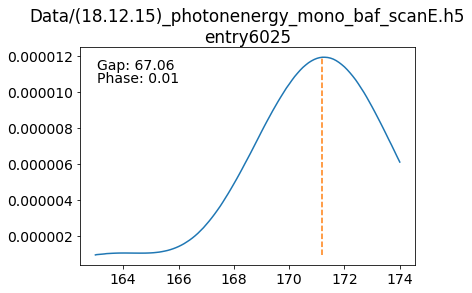

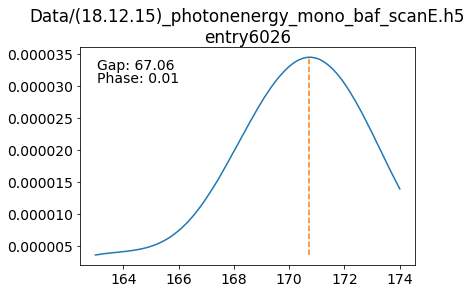

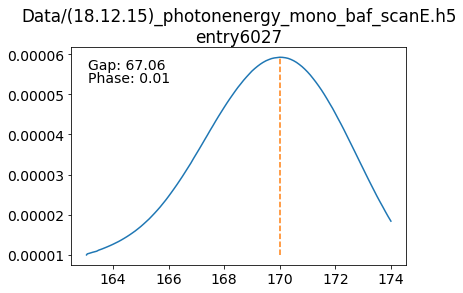

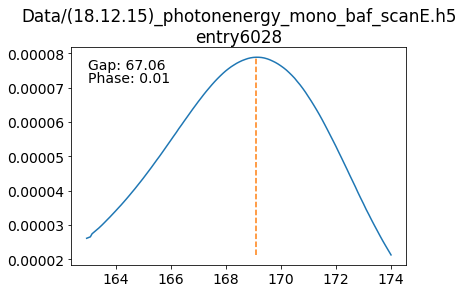

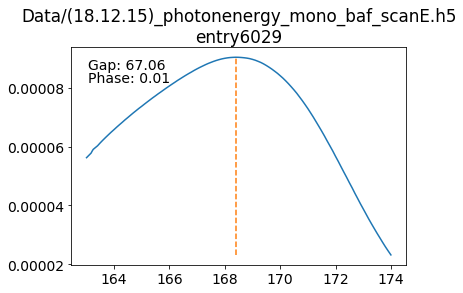

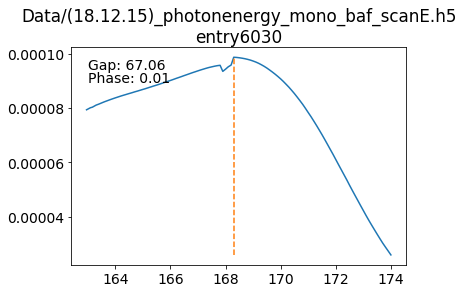

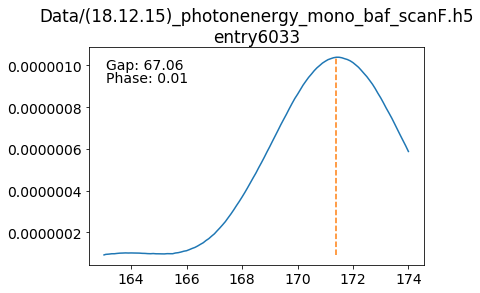

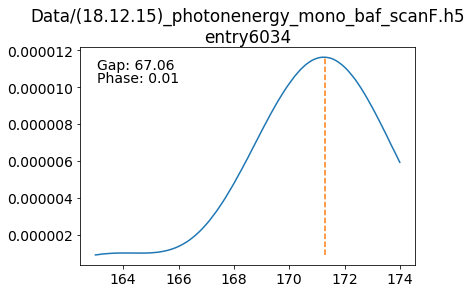

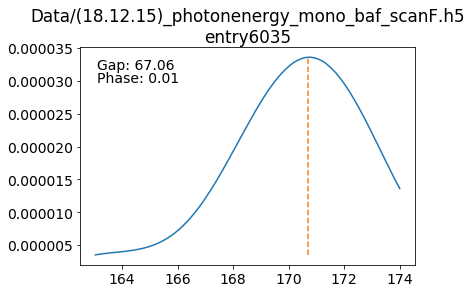

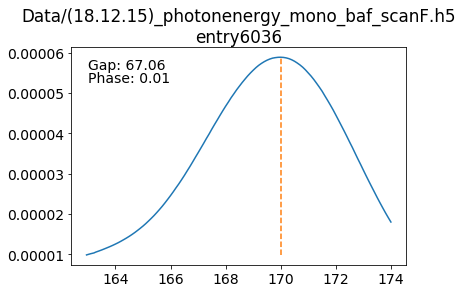

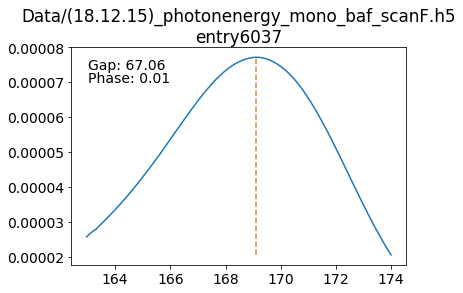

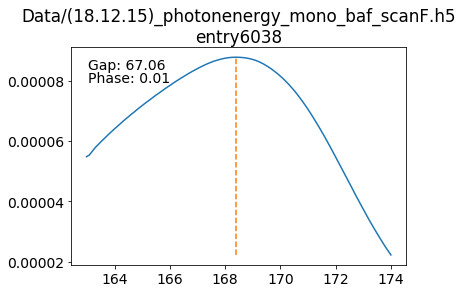

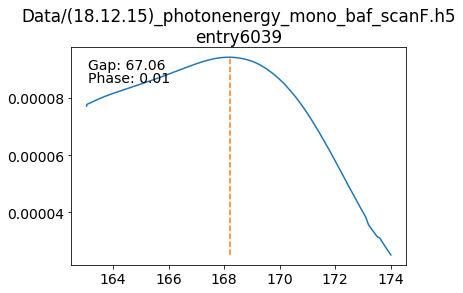

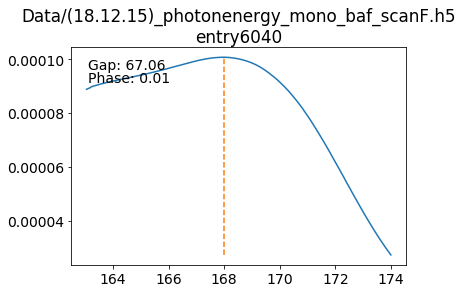

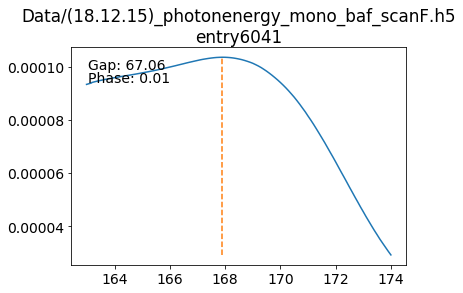

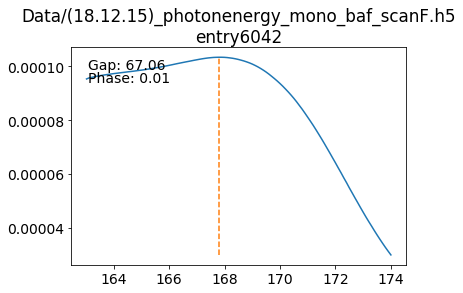

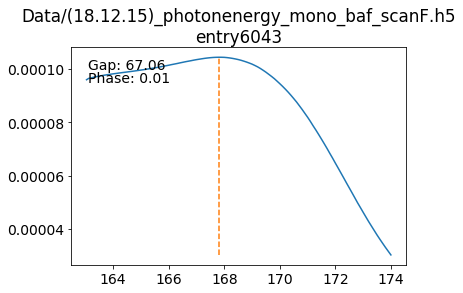

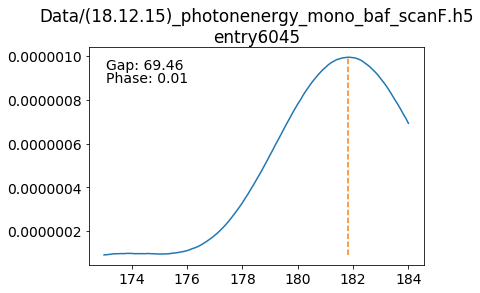

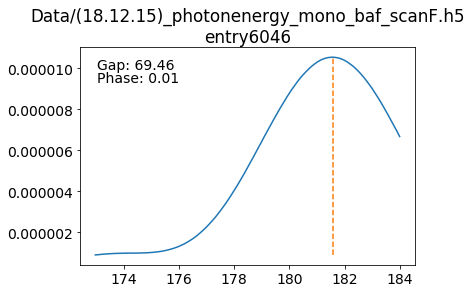

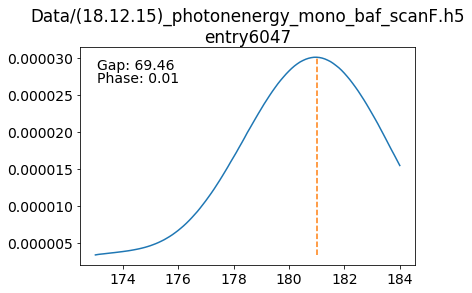

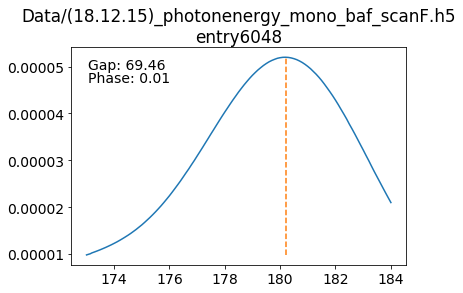

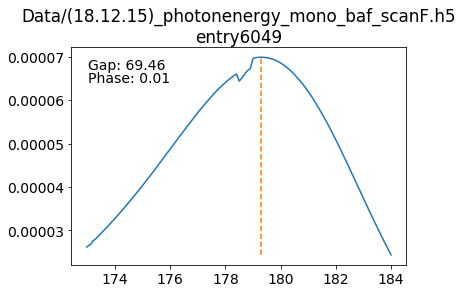

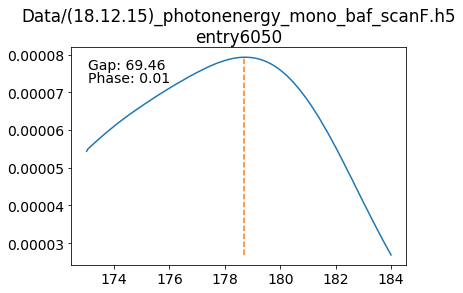

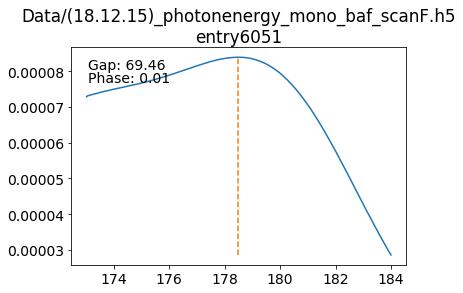

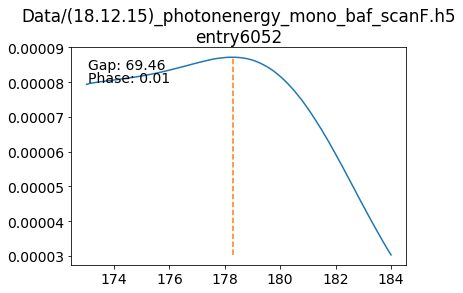

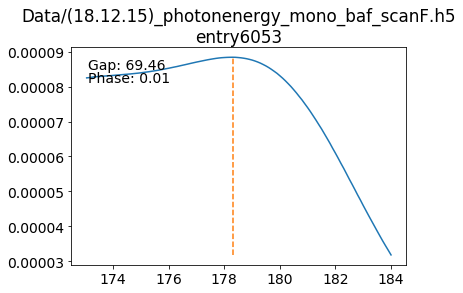

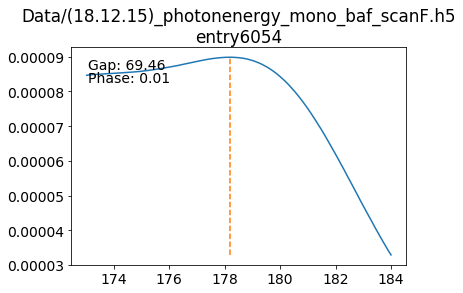

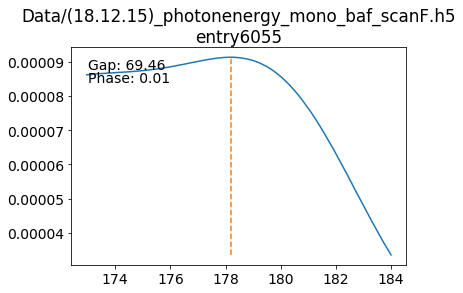

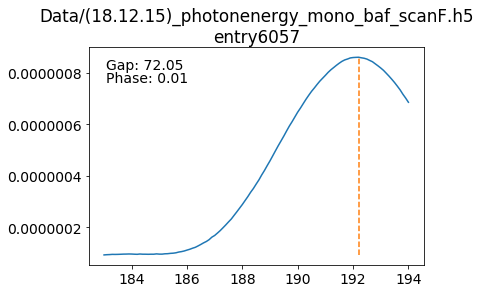

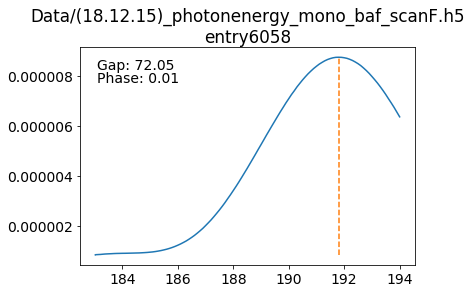

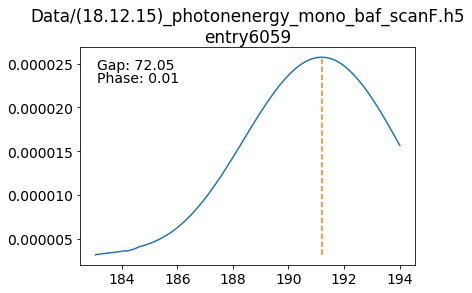

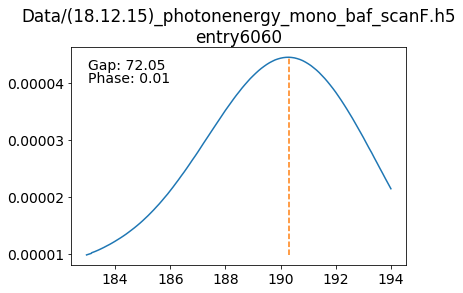

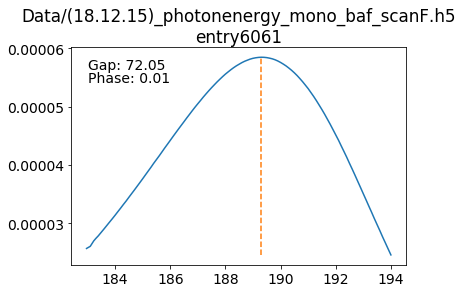

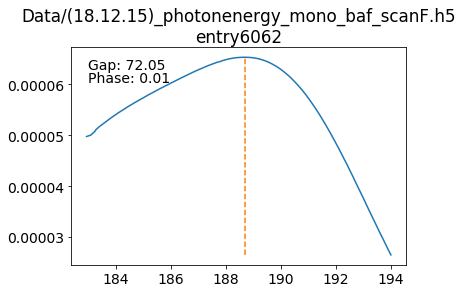

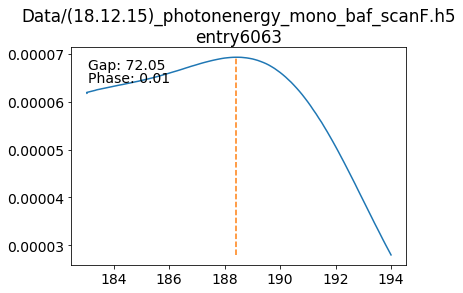

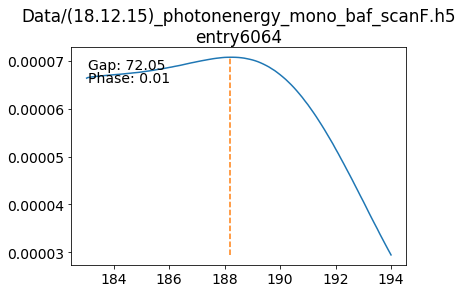

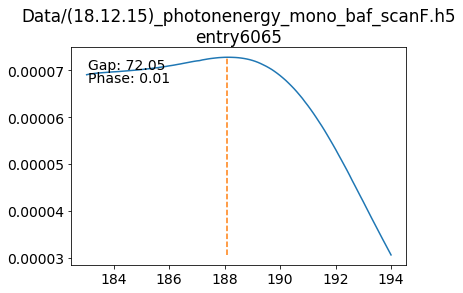

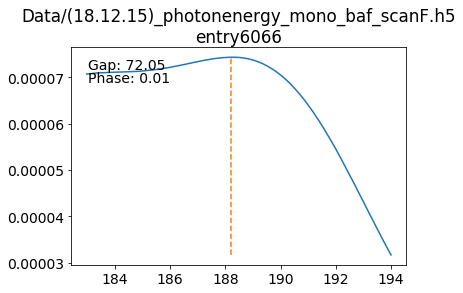

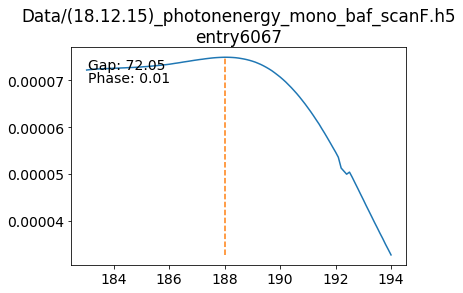

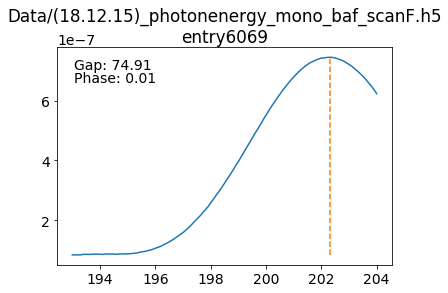

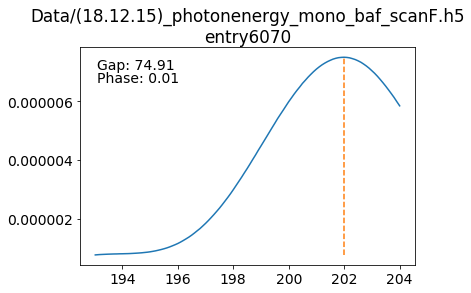

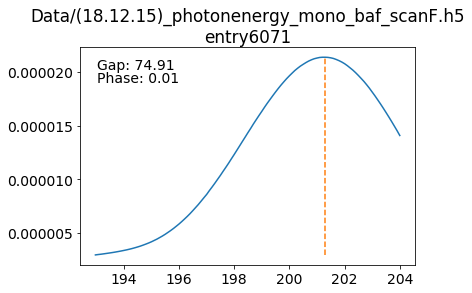

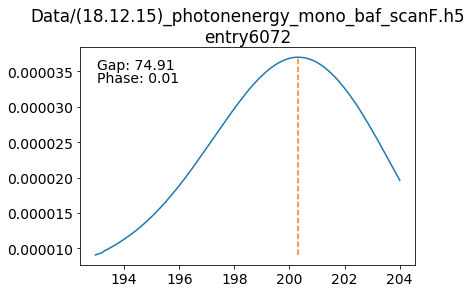

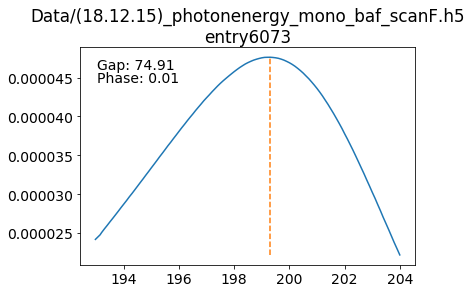

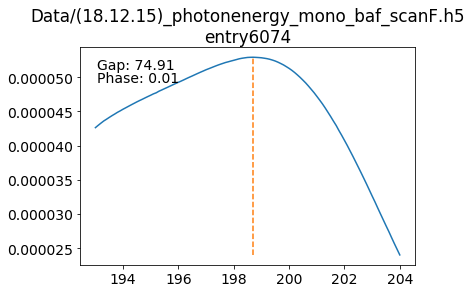

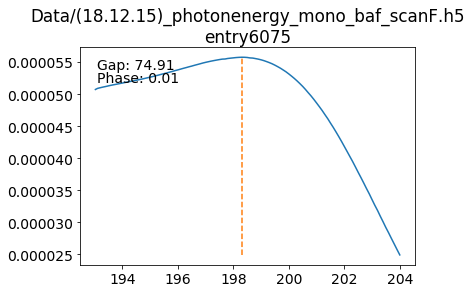

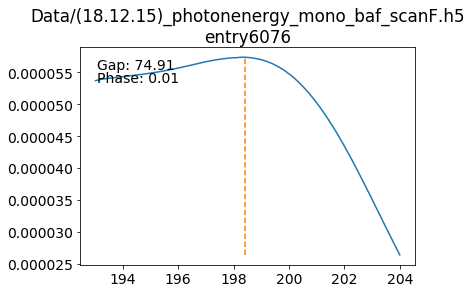

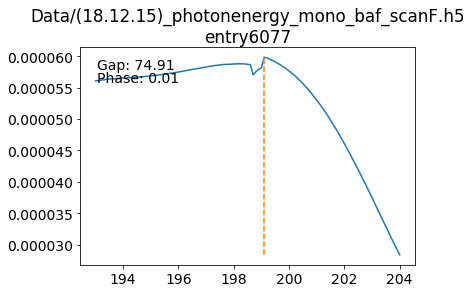

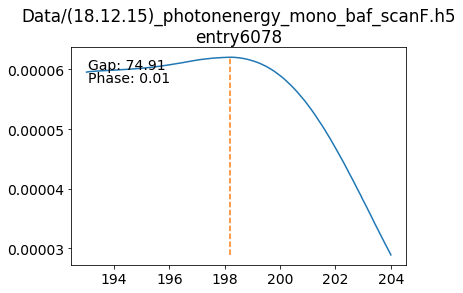

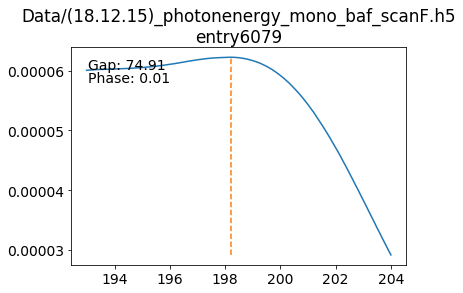

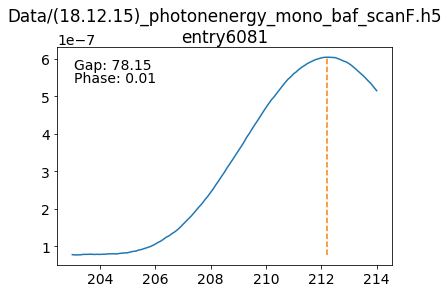

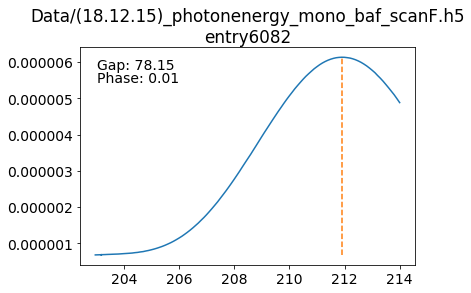

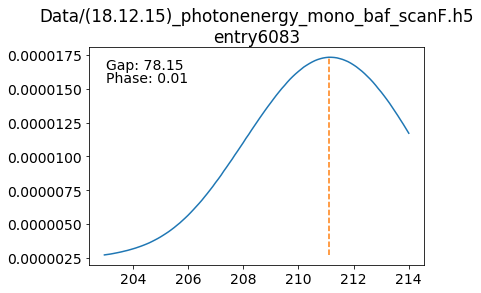

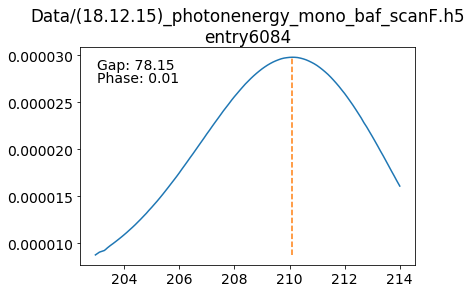

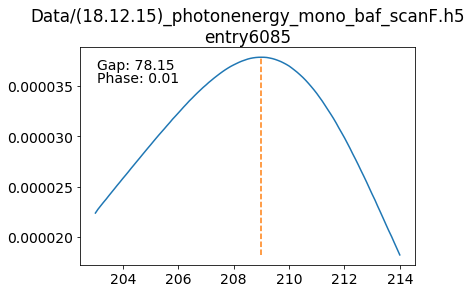

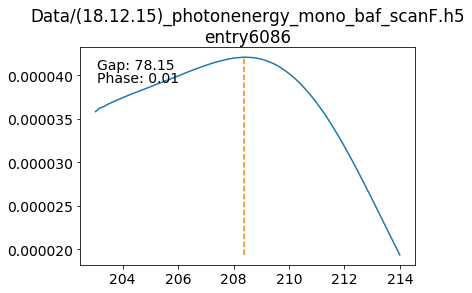

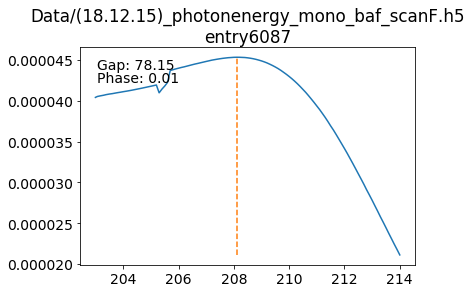

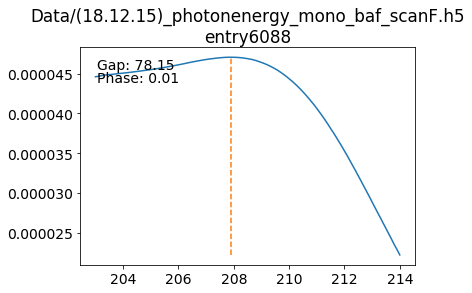

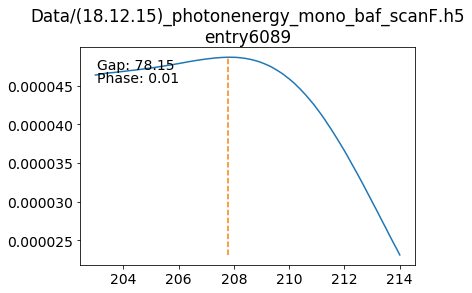

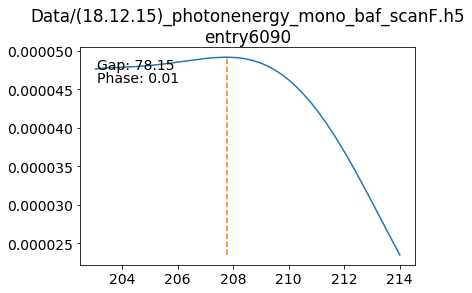

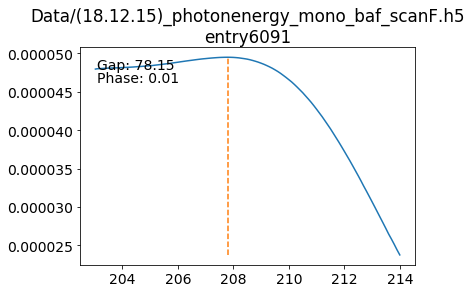

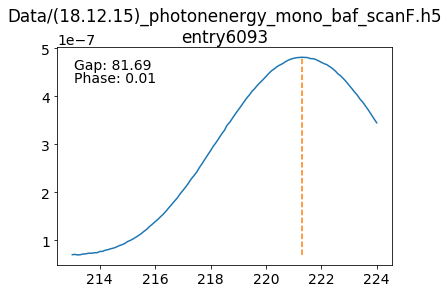

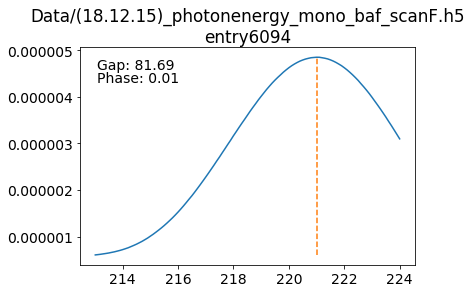

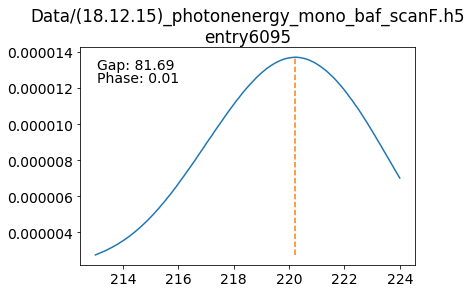

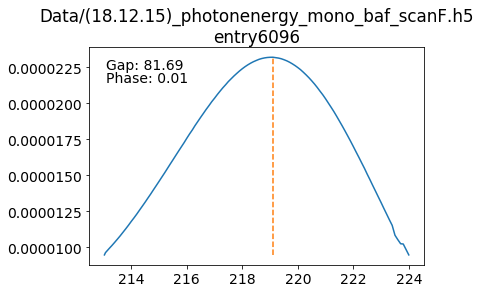

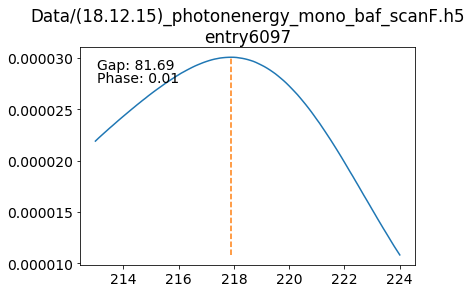

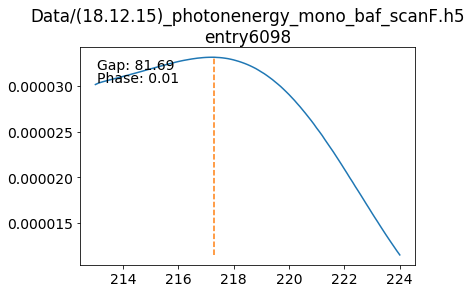

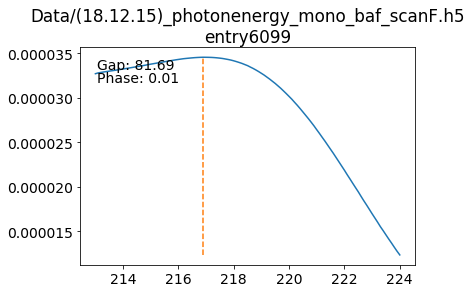

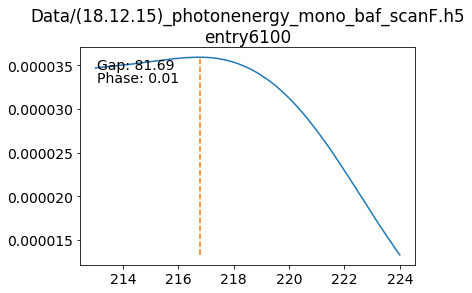

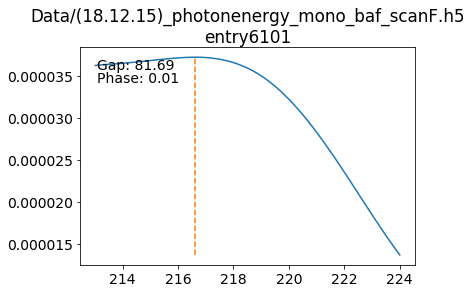

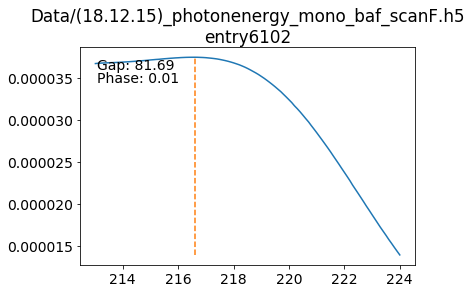

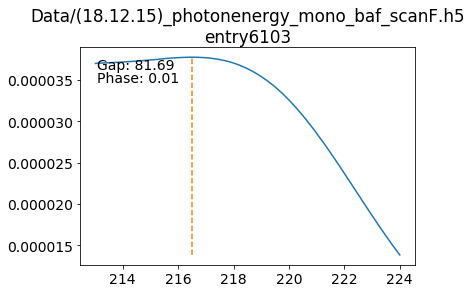

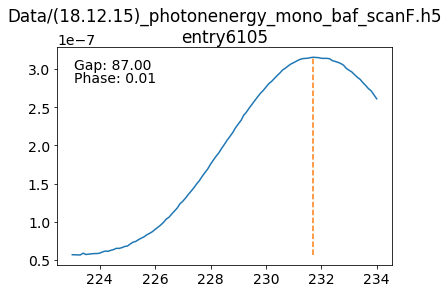

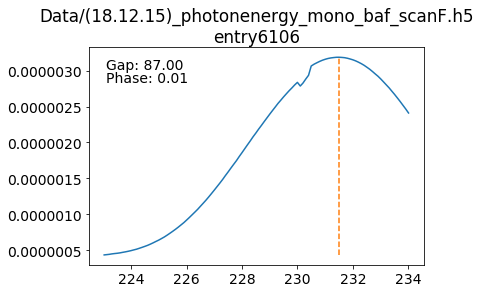

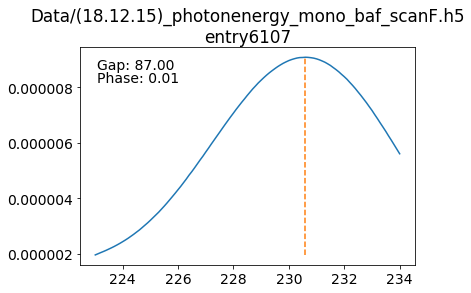

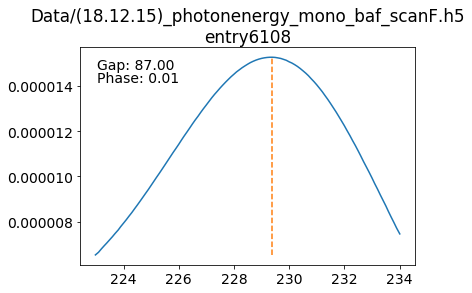

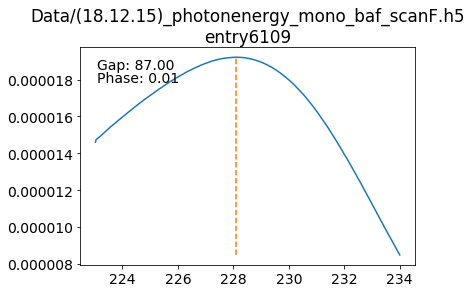

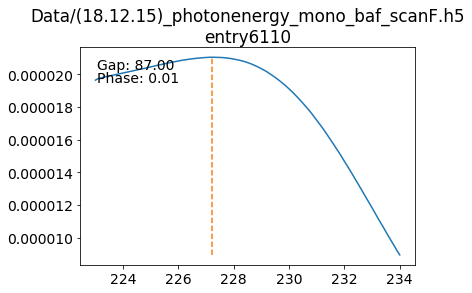

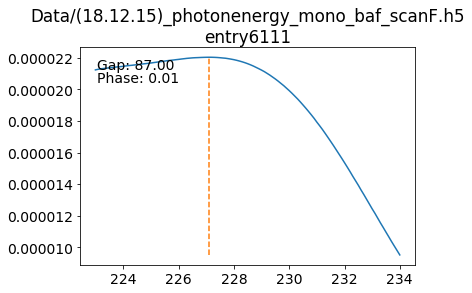

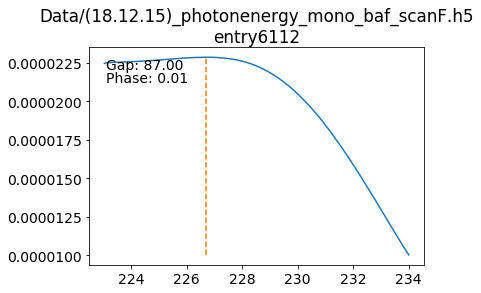

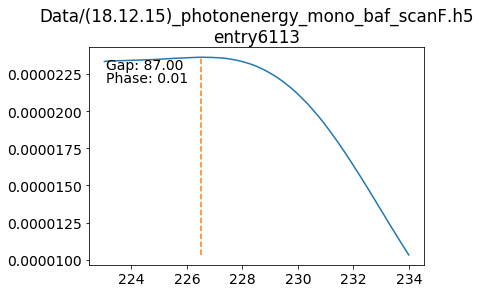

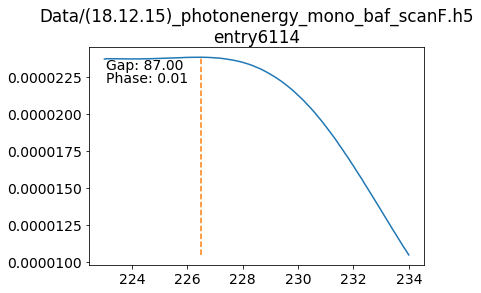

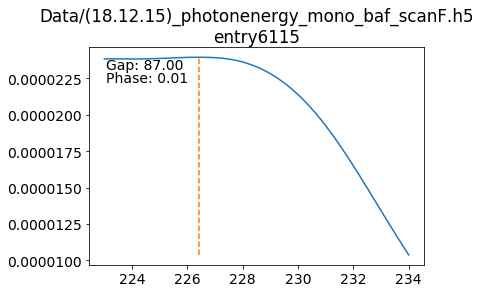

In [6]:
hv=[]
hv_now=0
for element in scansToLoad:
    fileName = element[0]
    scanIndex = element[1]
    scan = HDF5loadscan(fileName,scanIndex)
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    plt.plot(scan['mono_energy'],scan['diodeCurrent'])
    plt.title("{0}\nentry{1}".format(fileName,scanIndex))
    if EPU_info_exists(fileName,scanIndex):
        ax=gca()
        plt.text(0.05,0.9,"Gap: {0:.2f}".format(scan['EPU_R1_110_GAPposition'][-1]),transform=ax.transAxes)
        plt.text(0.05,0.84,"Phase: {0:.2f}".format(scan['EPU_R1_110_PHASEposition'][-1]),transform=ax.transAxes)       
    current_max=max(scan['diodeCurrent'])
    current_min=min(scan['diodeCurrent'])
    current_max_index=scan['diodeCurrent'].index(current_max)
    hv_max=scan['mono_energy'][current_max_index]
    
    if hv_max > (hv_now+5):
        hv.append([])
    hv_now=hv_max
    hv[-1].append(hv_max)
        
    plt.plot([hv_max,hv_max],[current_min,current_max],linestyle='--')

            
    plt.show()

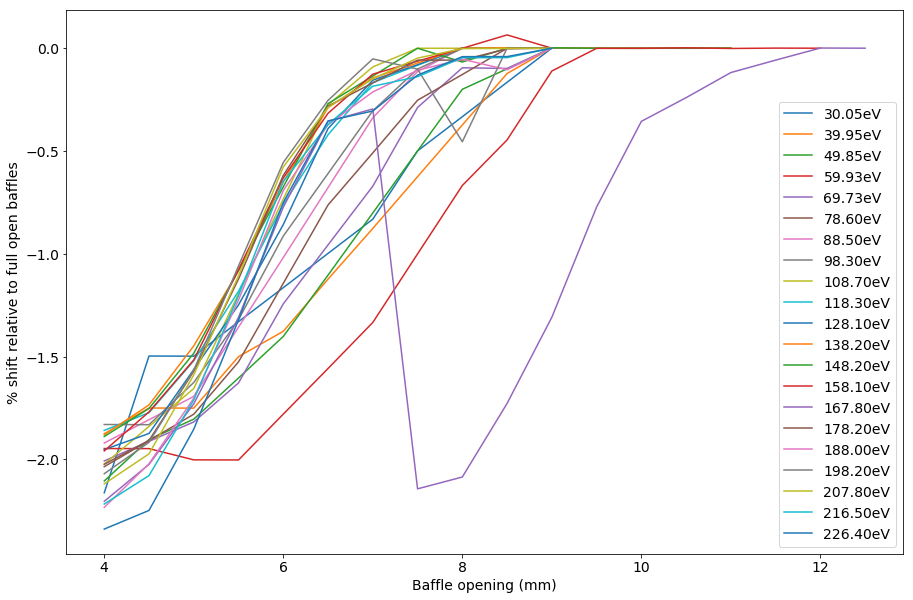

In [7]:
fig=plt.figure(figsize=(15,10))
for photonEnergy in hv:
    baffleOpening=[(4+0.5*n) for n in range(len(photonEnergy))]
    photonEnergy_normalized=[100-(100*n/photonEnergy[-1]) for n in photonEnergy]
    plt.plot(baffleOpening,photonEnergy_normalized,label="{0:.2f}eV".format(photonEnergy[-1]))
plt.legend()
plt.ylabel("% shift relative to full open baffles")
plt.xlabel("Baffle opening (mm)")
plt.show()

These measurements are covering a range of gaps from arond 33mm to 87mm.There are a couple of sets that appear to be outliers.

** IMPORTANT NOTE: ** I don't know what aperture the sets start from, so I assumed 4mm and steps of 0.25mm.

For clarity, let's only plot a few of these:

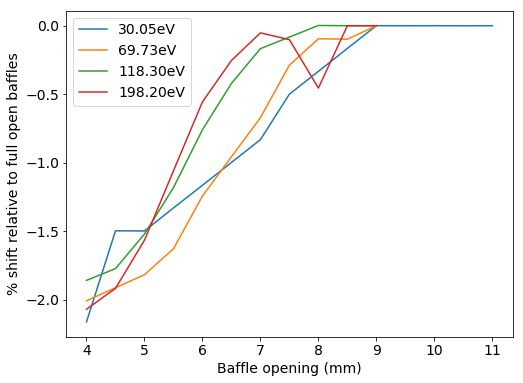

In [8]:
fig=plt.figure(figsize=(8,6))
for photonEnergy in hv:
    baffleOpening=[(4+0.5*n) for n in range(len(photonEnergy))]
    photonEnergy_normalized=[100-(100*n/photonEnergy[-1]) for n in photonEnergy]
    if valuesAreClose(photonEnergy[-1],30) or valuesAreClose(photonEnergy[-1],70) or valuesAreClose(photonEnergy[-1],120) or valuesAreClose(photonEnergy[-1],200):
        plt.plot(baffleOpening,photonEnergy_normalized,label="{0:.2f}eV".format(photonEnergy[-1]))

plt.legend()
plt.ylabel("% shift relative to full open baffles")
plt.xlabel("Baffle opening (mm)")
plt.show()

It seems broadly as we expected from the calculations: the higher energy measurements have a sharper edge, and the change is about 2-2.5%.

If we directly compare a calculation and measurement, (assuming the 4mm starting point is correct, and that this corresponds to a true opening of 0.5mm):

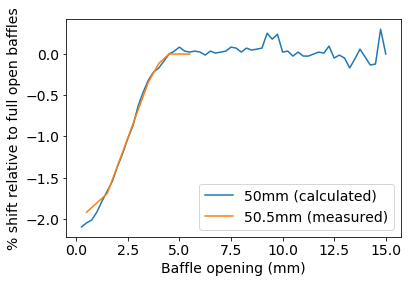

In [9]:
plt.plot(opening_50mm,peak_hv_50mm_normalized,label="50mm (calculated)") 
for photonEnergy in hv:
    if valuesAreClose(photonEnergy[-1],88):
        baffleOpening=[(0.5+0.5*n) for n in range(len(photonEnergy))]
        photonEnergy_normalized=[100-(100*n/photonEnergy[-1]) for n in photonEnergy]
        plt.plot(baffleOpening,photonEnergy_normalized,label="50.5mm (measured)")
           
plt.legend()
plt.ylabel("% shift relative to full open baffles")
plt.xlabel("Baffle opening (mm)")
plt.show()

Nice!